In [1]:
# NOTE: Run using the path to the jupyter executable inside your virtual environment!

import os
import sys
from pathlib import Path

from shapely import Point, LineString, Polygon, MultiPolygon

curr_file_path = Path().absolute()

utilities_path = os.path.abspath(os.path.join(curr_file_path, "..", "utilities"))
sys.path.append(utilities_path)
import visualization as viz

segmenter_path = os.path.abspath(os.path.join(curr_file_path, "..", "src", "segmenter"))
sys.path.append(segmenter_path)
from fix_polygon import fix_polygon

# interactive plots
%matplotlib widget

False


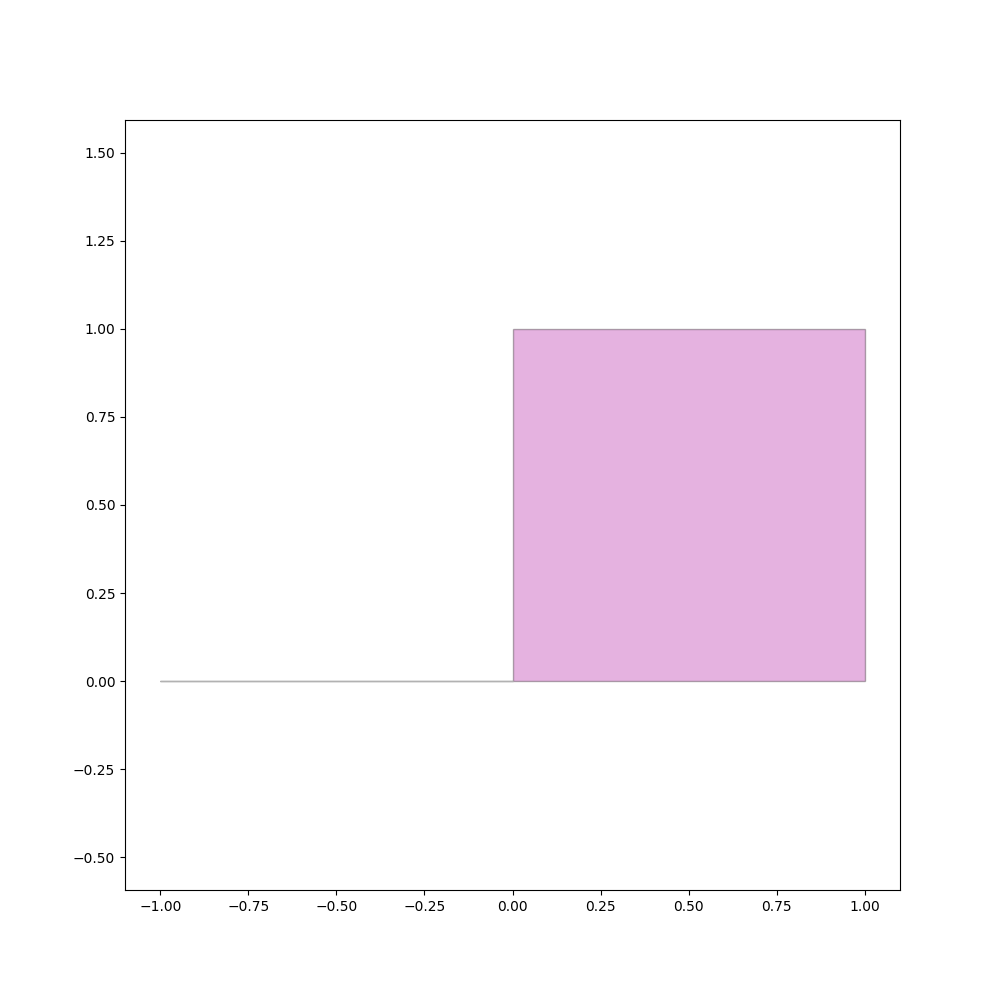

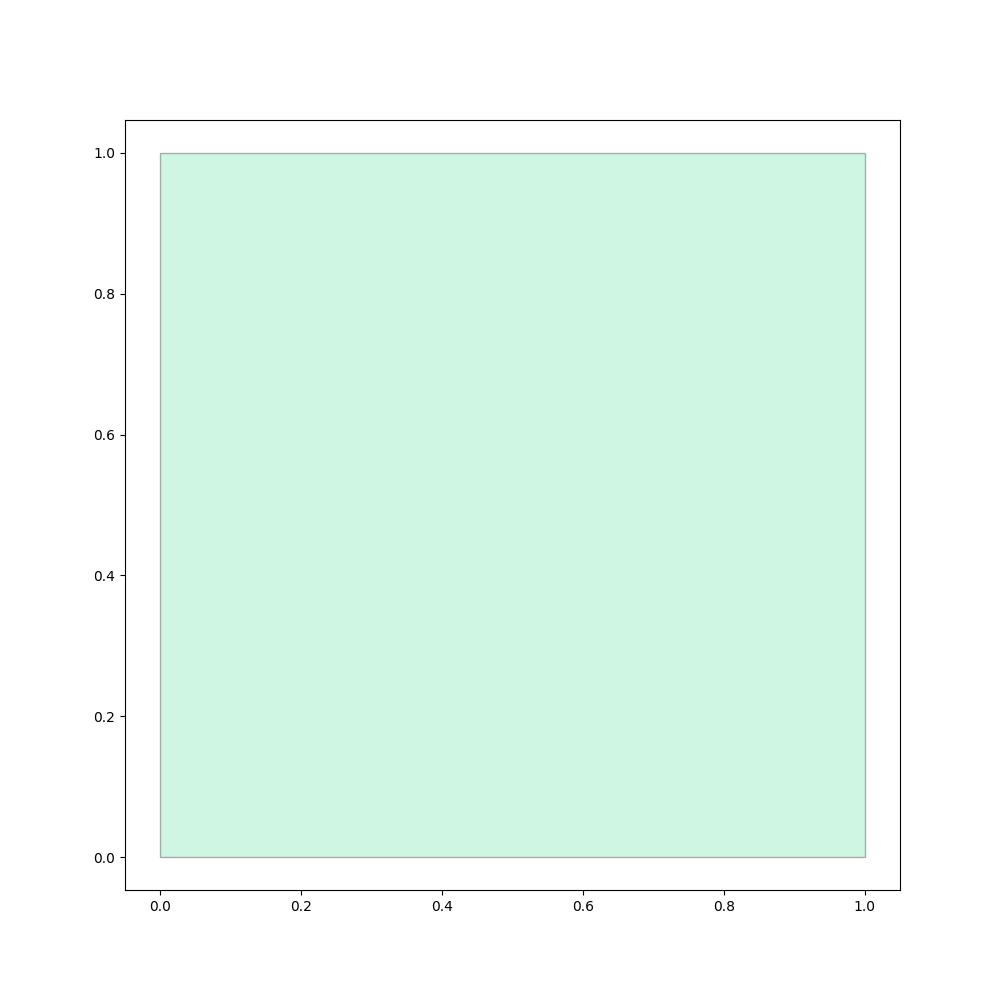

True


In [2]:
# dangling segment
coords = [
    Point(0, 0),
    Point(0, 1),
    Point(1, 1), 
    Point(1, 0),
    Point(0, 0),
    Point(-1, 0), # dangling segment
    Point(0, 0),
]
polygon = Polygon(coords)
print(polygon.is_valid)
viz.show_polygons([polygon])

fixed = fix_polygon(polygon)
viz.show_polygons(fixed)
for f in fixed:
    print(f.is_valid)

False


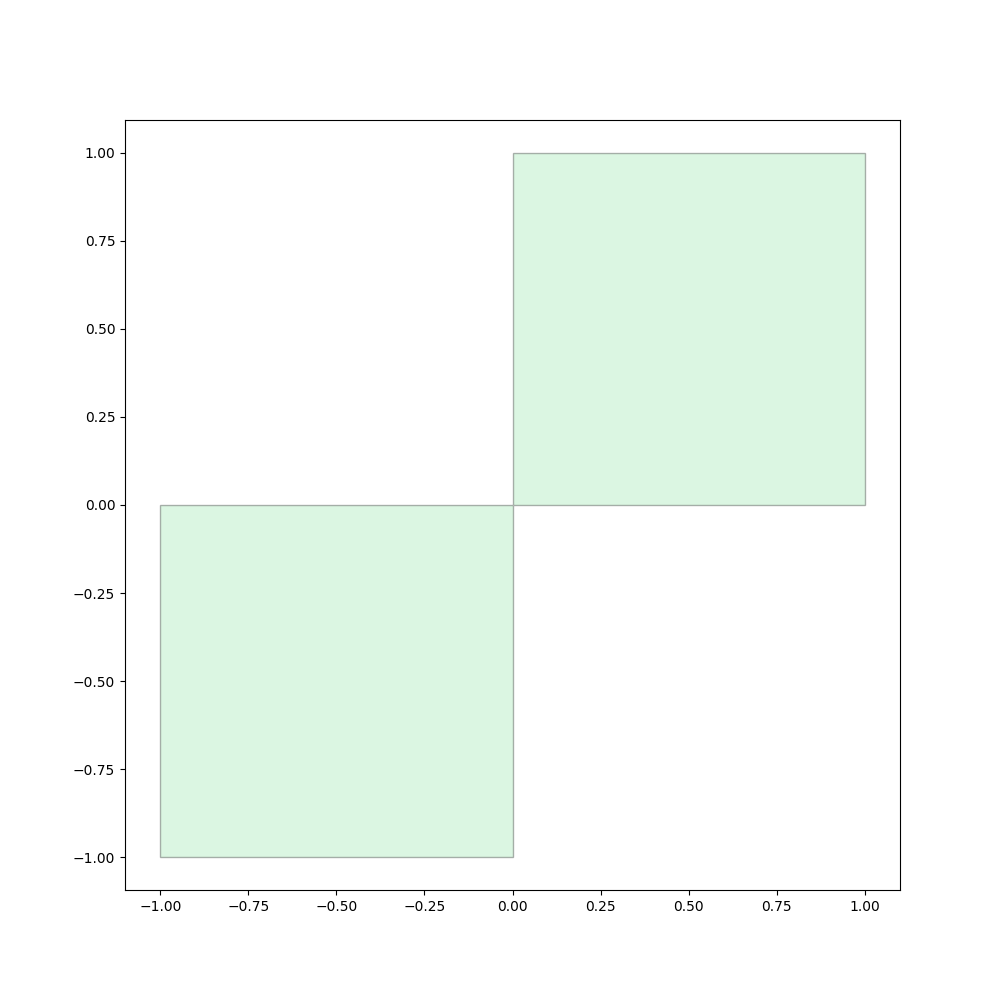

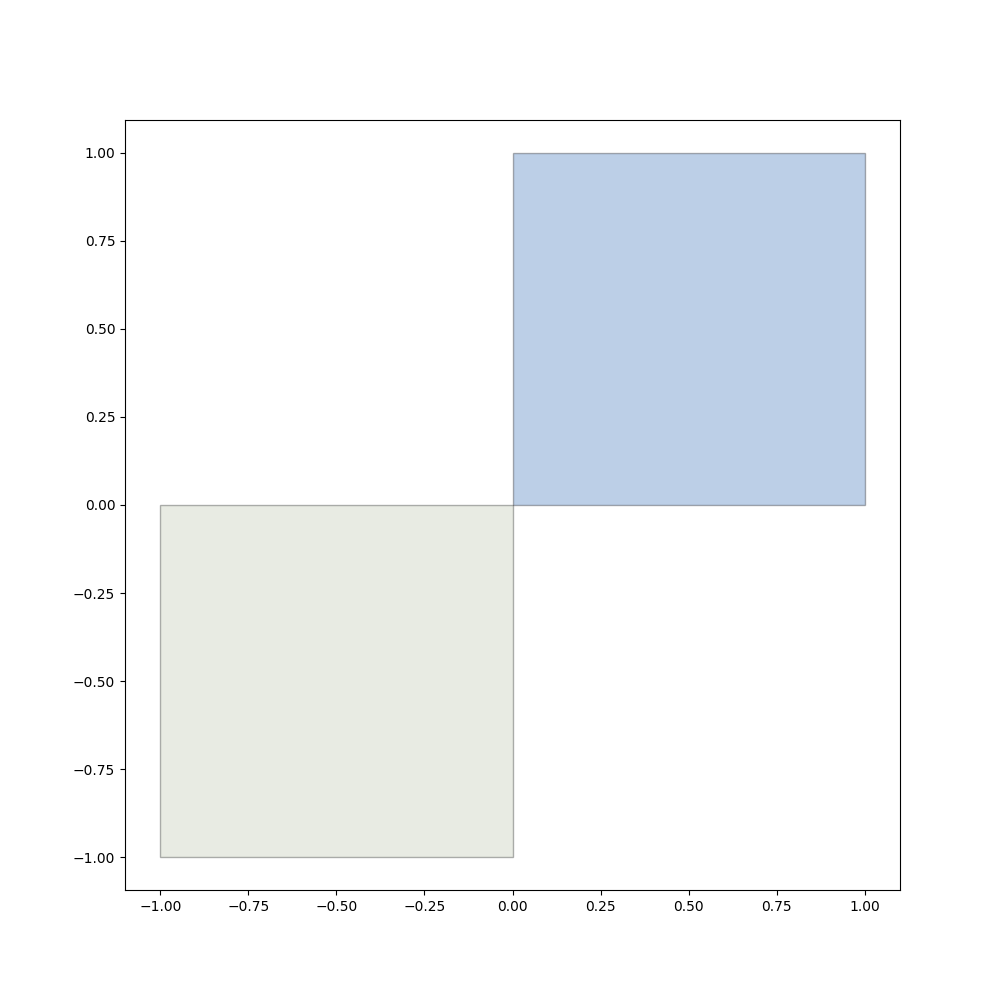

True
True


In [3]:
# dangling area
coords = [
    Point(0, 0),
    Point(0, 1),
    Point(1, 1), 
    Point(1, 0),
    Point(0, 0),
    # begin: dangling area
    Point(-1, 0),
    Point(-1, -1),
    Point(0, -1),
    # end: dangling area
    Point(0, 0),
]
polygon = Polygon(coords)
print(polygon.is_valid)
viz.show_polygons([polygon])

fixed = fix_polygon(polygon)
viz.show_polygons(fixed)
for f in fixed:
    print(f.is_valid)

False


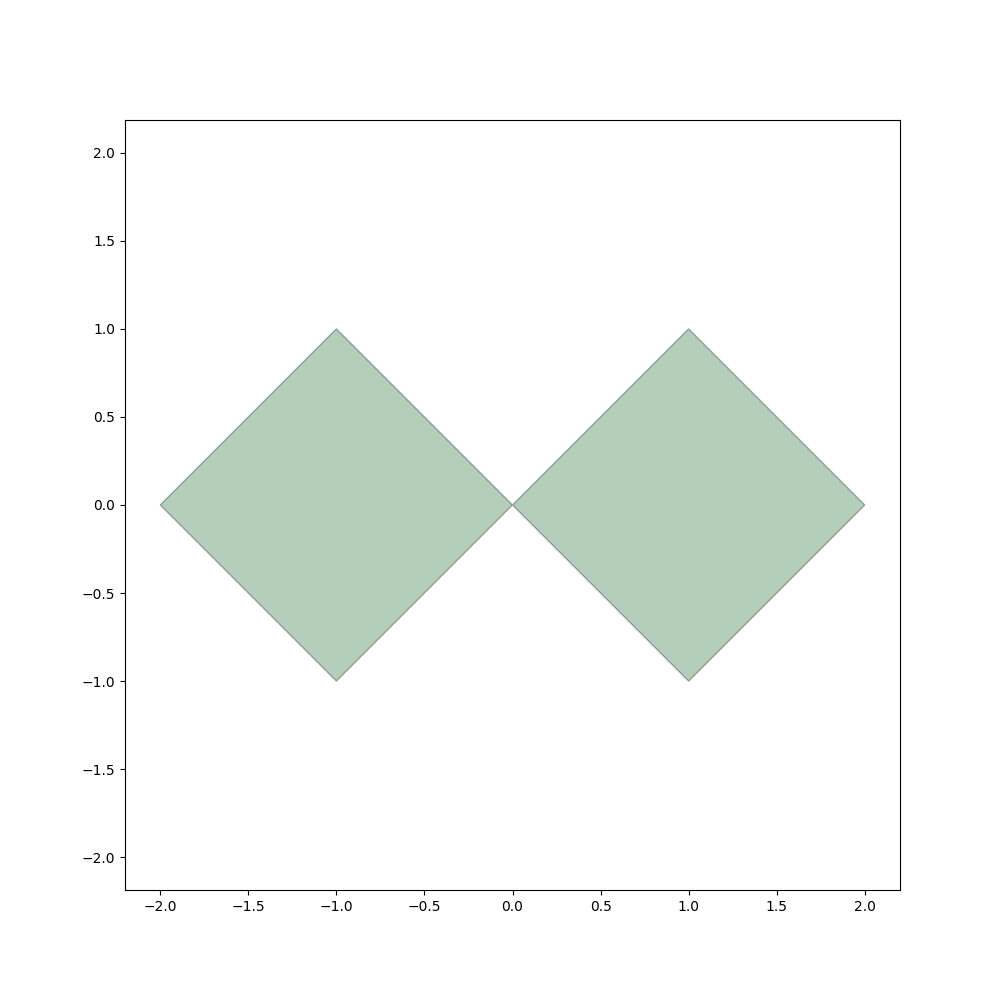

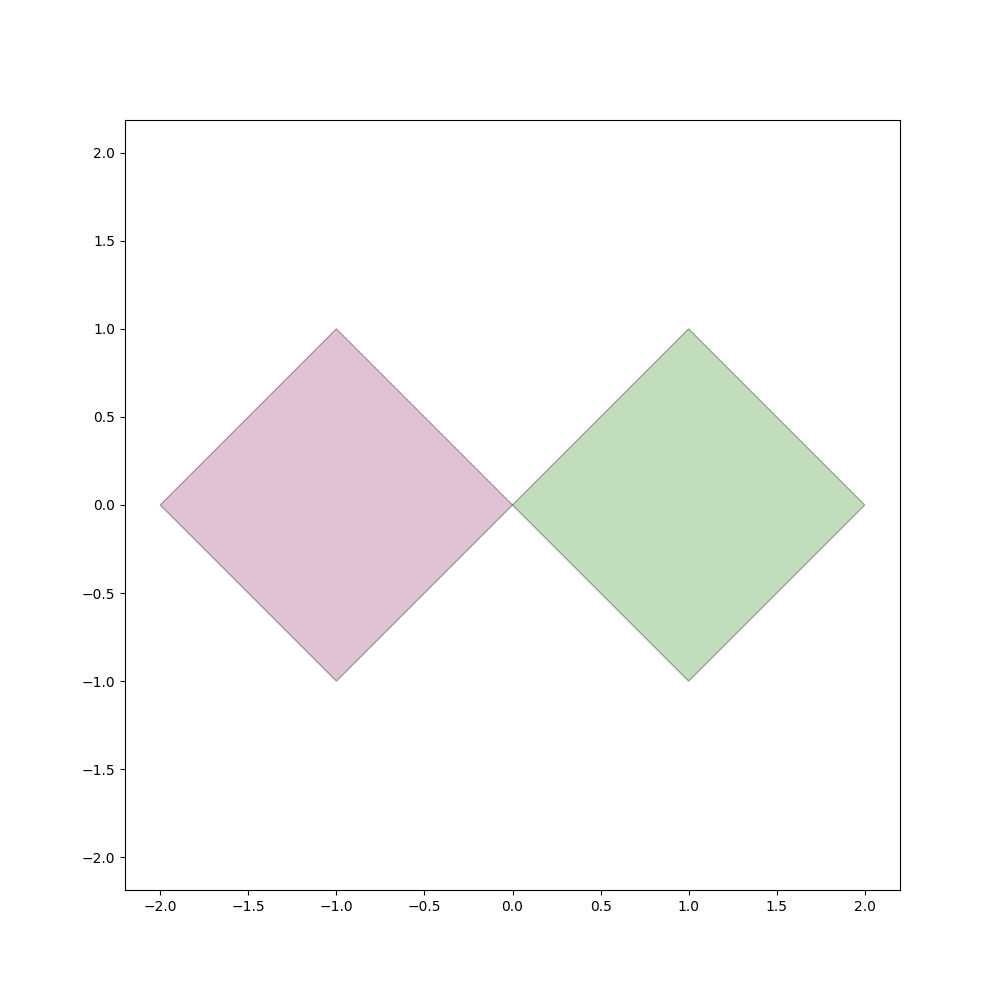

True
True


In [4]:
# self-intersection is not at coord
coords = [
    Point(-2, 0),
    Point(-1, 1),
    Point(1, -1), 
    Point(2, 0),
    Point(1, 1),
    Point(-1, -1),
    Point(-2, 0),
]
polygon = Polygon(coords)
print(polygon.is_valid)
viz.show_polygons([polygon])

fixed = fix_polygon(polygon)
viz.show_polygons(fixed)
for f in fixed:
    print(f.is_valid)

False


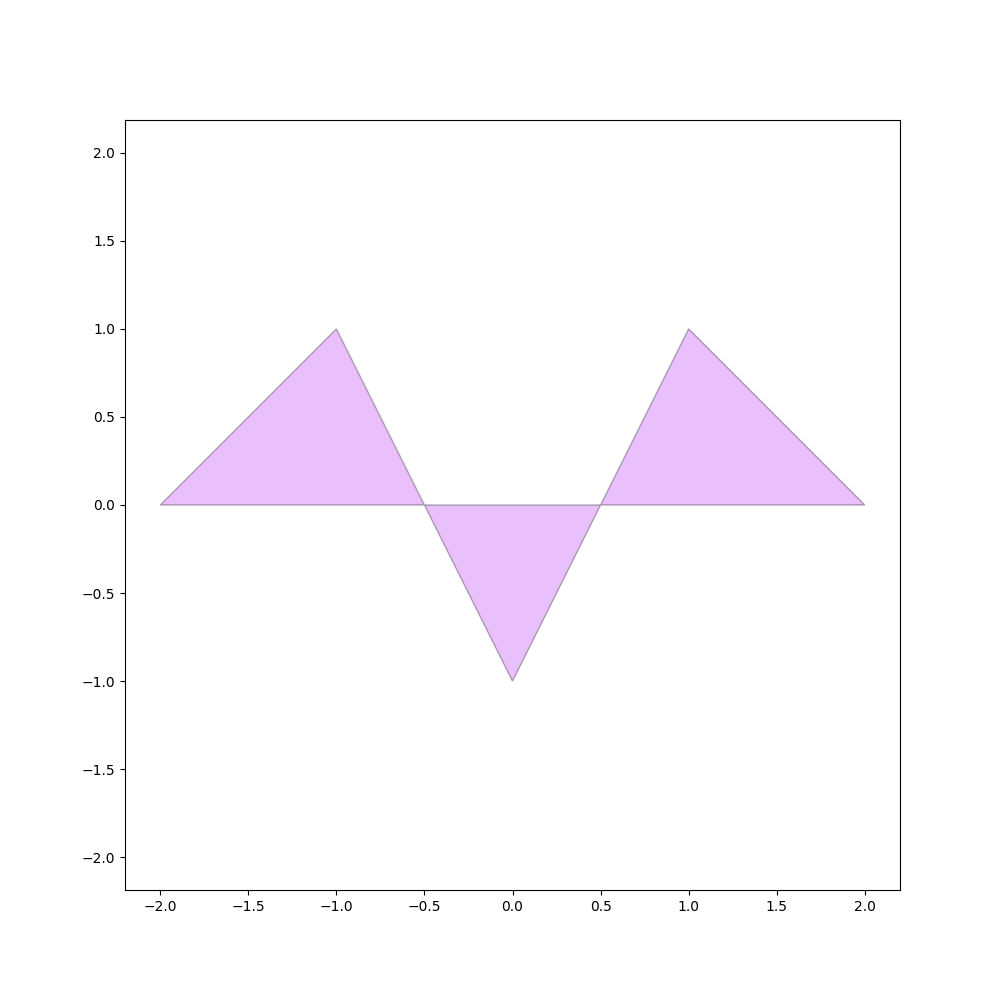

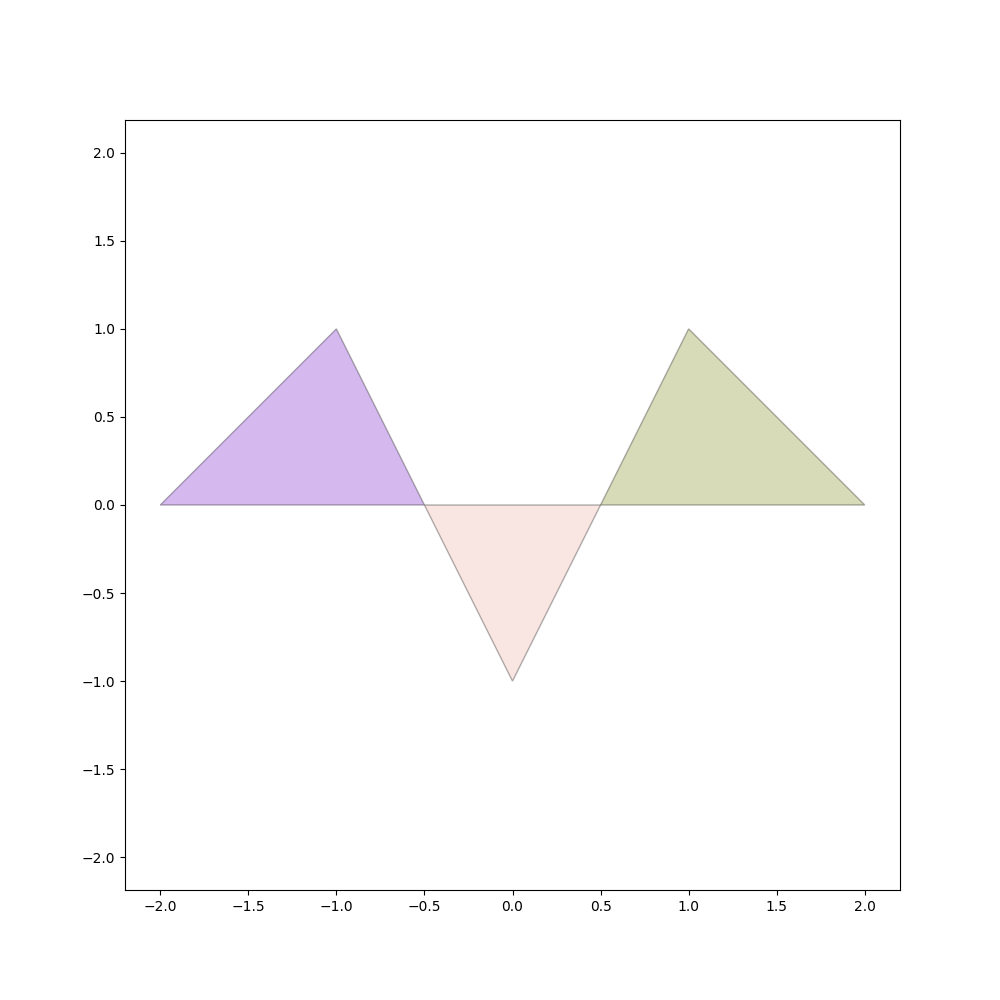

True
True
True


In [5]:
# double self-intersection
coords = [
    Point(-2, 0),
    Point(-1, 1),
    Point(0, -1),
    Point(1, 1),
    Point(2, 0),
    Point(-2, 0),
]
polygon = Polygon(coords)
print(polygon.is_valid)
viz.show_polygons([polygon])

fixed = fix_polygon(polygon)
viz.show_polygons(fixed)
for f in fixed:
    print(f.is_valid)

True


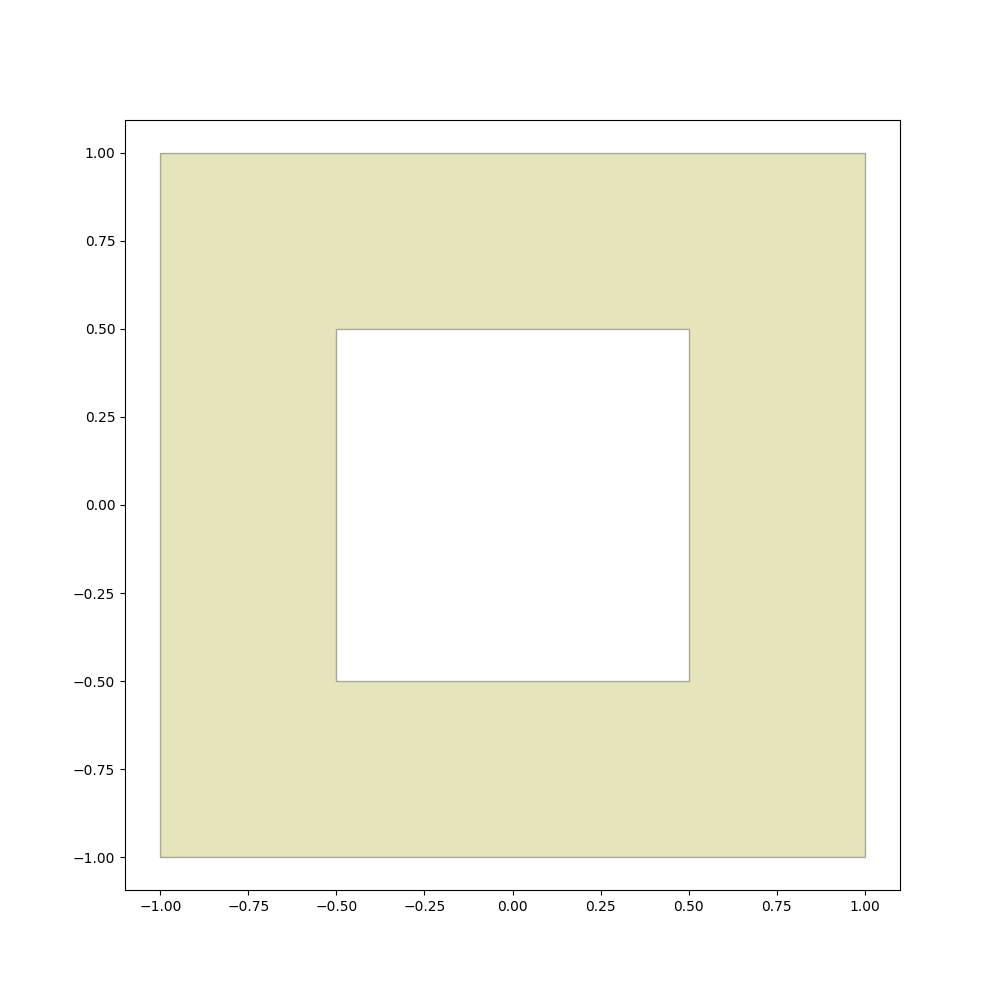

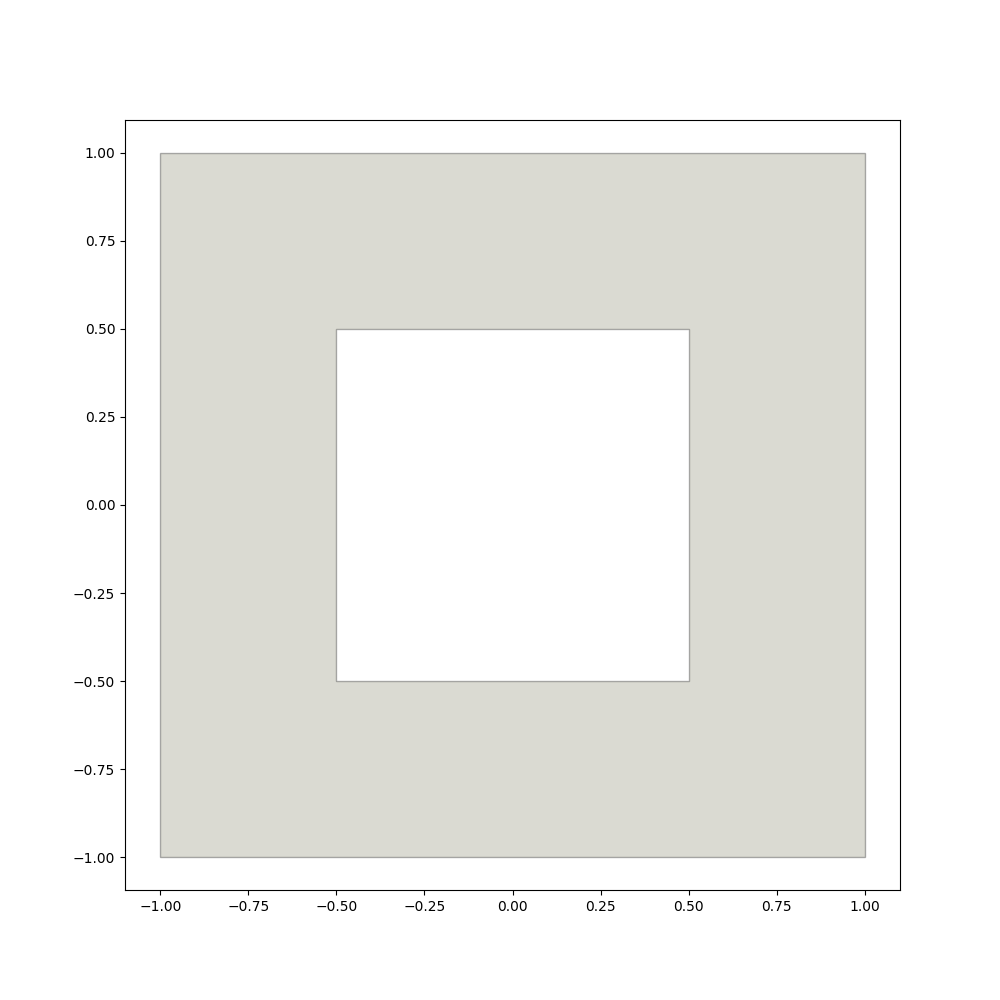

True


In [6]:
# has interior
exterior_coords = [
    Point(-1, -1),
    Point(-1, 1),
    Point(1, 1),
    Point(1, -1),
    Point(-1, -1),
]
interior_coords = [
    Point(-0.5, -0.5),
    Point(-0.5, 0.5),
    Point(0.5, 0.5),
    Point(0.5, -0.5),
    Point(-0.5, -0.5),
]

polygon = Polygon(LineString(exterior_coords), [LineString(interior_coords)])
print(polygon.is_valid)
viz.show_polygons([polygon])

fixed = fix_polygon(polygon)
viz.show_polygons(fixed)
for f in fixed:
    print(f.is_valid)

False


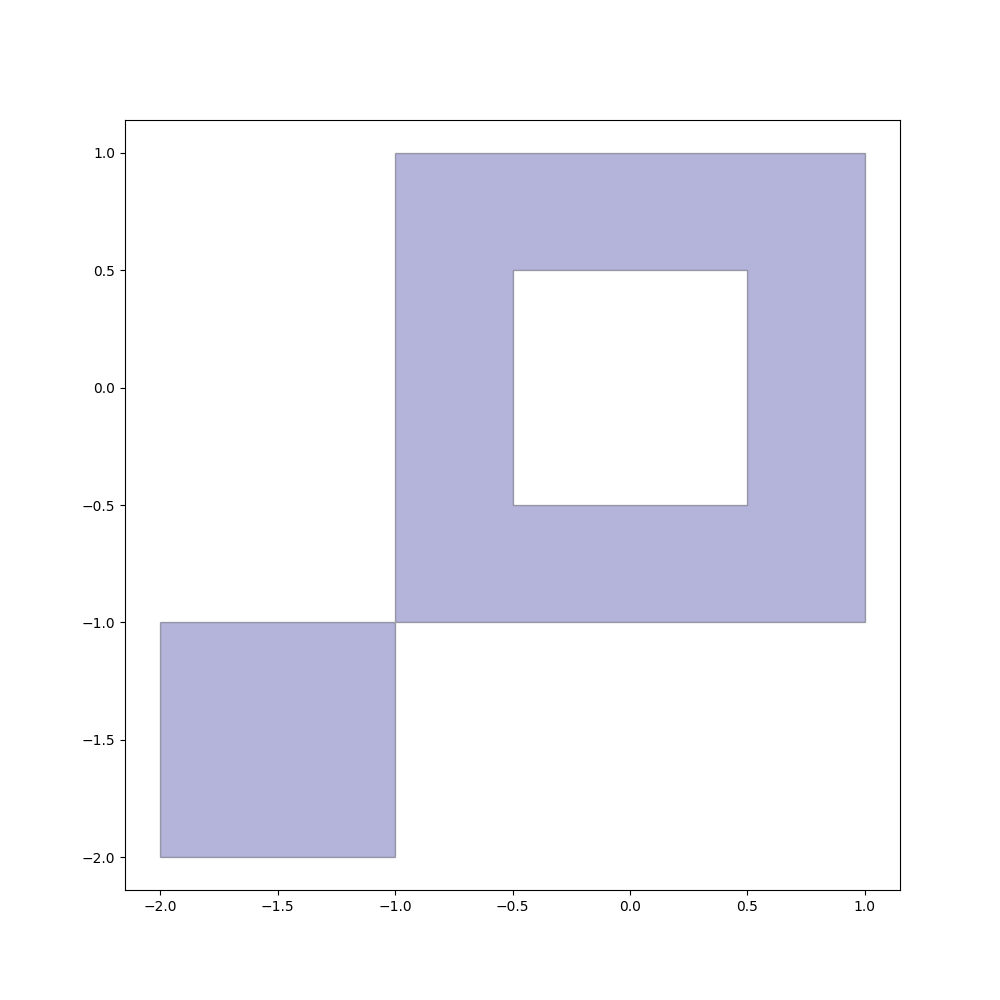

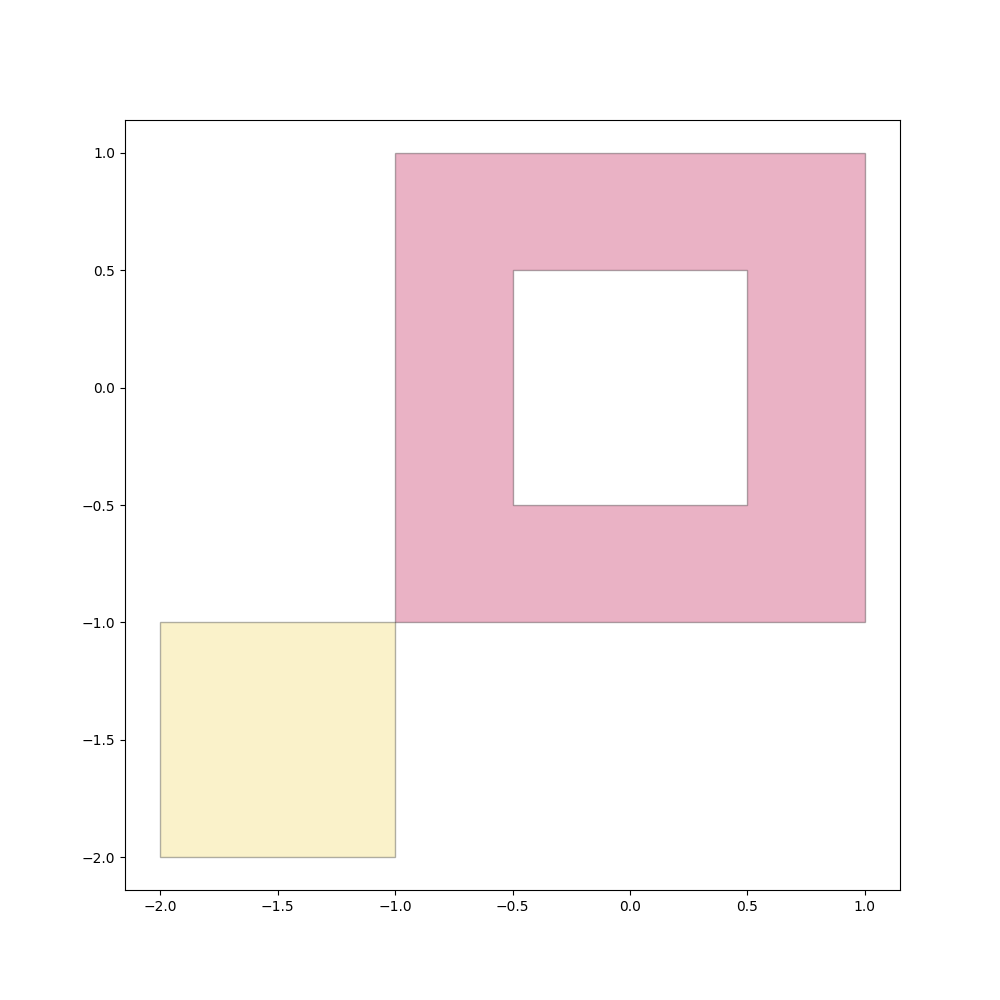

True
True


In [8]:
# has self-intersection and interior
exterior_coords = [
    Point(-1, -1),
    Point(-1, 1),
    Point(1, 1),
    Point(1, -1),
    Point(-1, -1),
    Point(-2, -1),
    Point(-2, -2),
    Point(-1, -2),
    Point(-1, -1),
]
interior_coords = [
    Point(-0.5, -0.5),
    Point(-0.5, 0.5),
    Point(0.5, 0.5),
    Point(0.5, -0.5),
    Point(-0.5, -0.5),
]

polygon = Polygon(LineString(exterior_coords), [LineString(interior_coords)])
print(polygon.is_valid)
viz.show_polygons([polygon])

fixed = fix_polygon(polygon)
viz.show_polygons(fixed)
for f in fixed:
    print(f.is_valid)

True


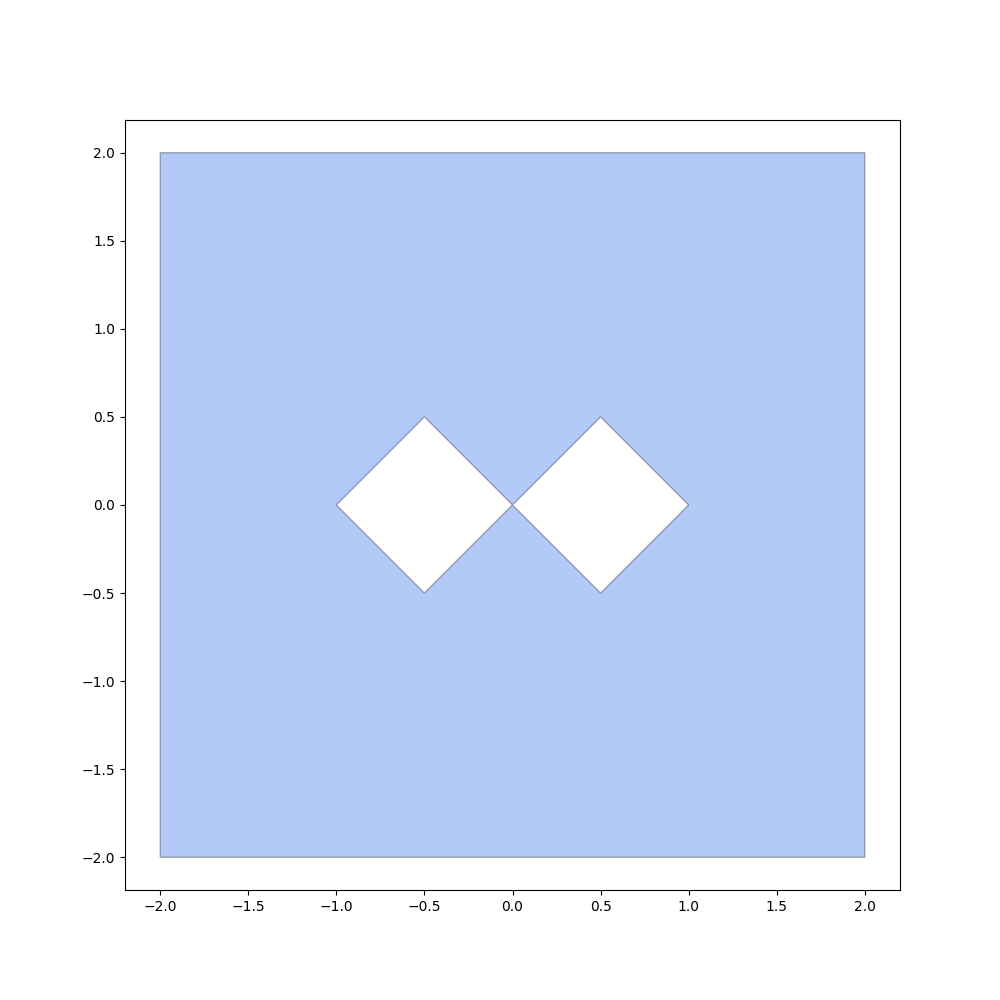

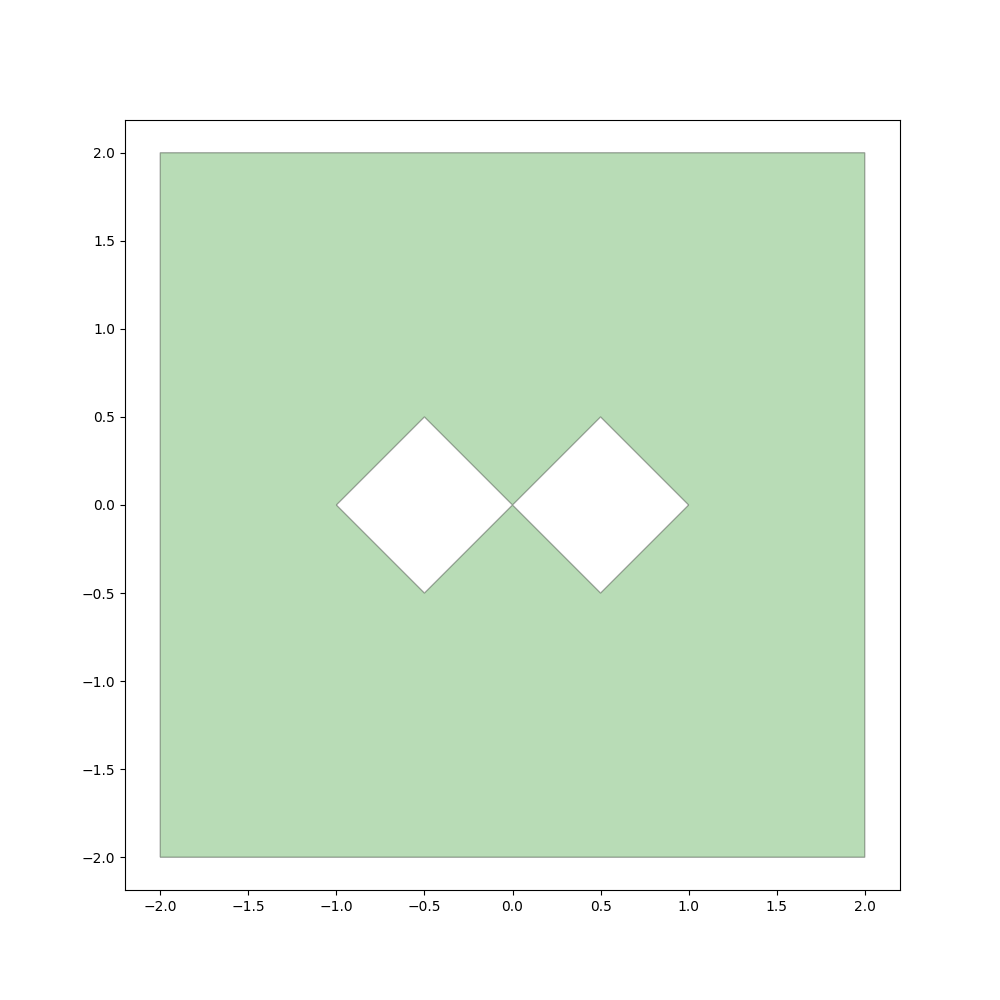

True


In [9]:
# interiors intersect at corner is okay
exterior = [
    Point(-2, -2),
    Point(-2, 2),
    Point(2, 2),
    Point(2, -2),
    Point(-2, -2),
]
interior_left = [
    Point(-1, 0),
    Point(-0.5, 0.5),
    Point(0, 0),
    Point(-0.5, -0.5),
    Point(-1, 0),
]
interior_right = [
    Point(1, 0),
    Point(0.5, -0.5),
    Point(0, 0),
    Point(0.5, 0.5),
    Point(1, 0),
]

polygon = Polygon(exterior, [interior_left, interior_right])
print(polygon.is_valid)
viz.show_polygons([polygon])

fixed = fix_polygon(polygon)
viz.show_polygons(fixed)
for f in fixed:
    print(f.is_valid)

True


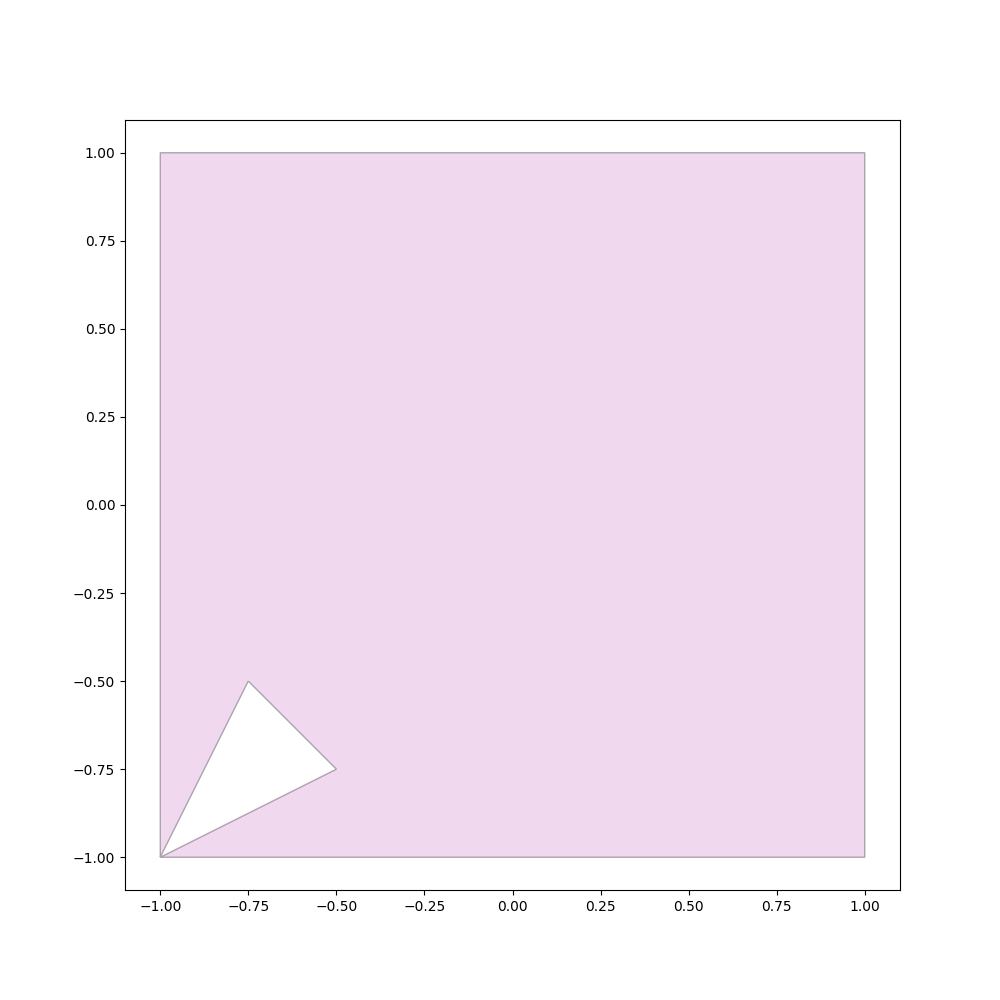

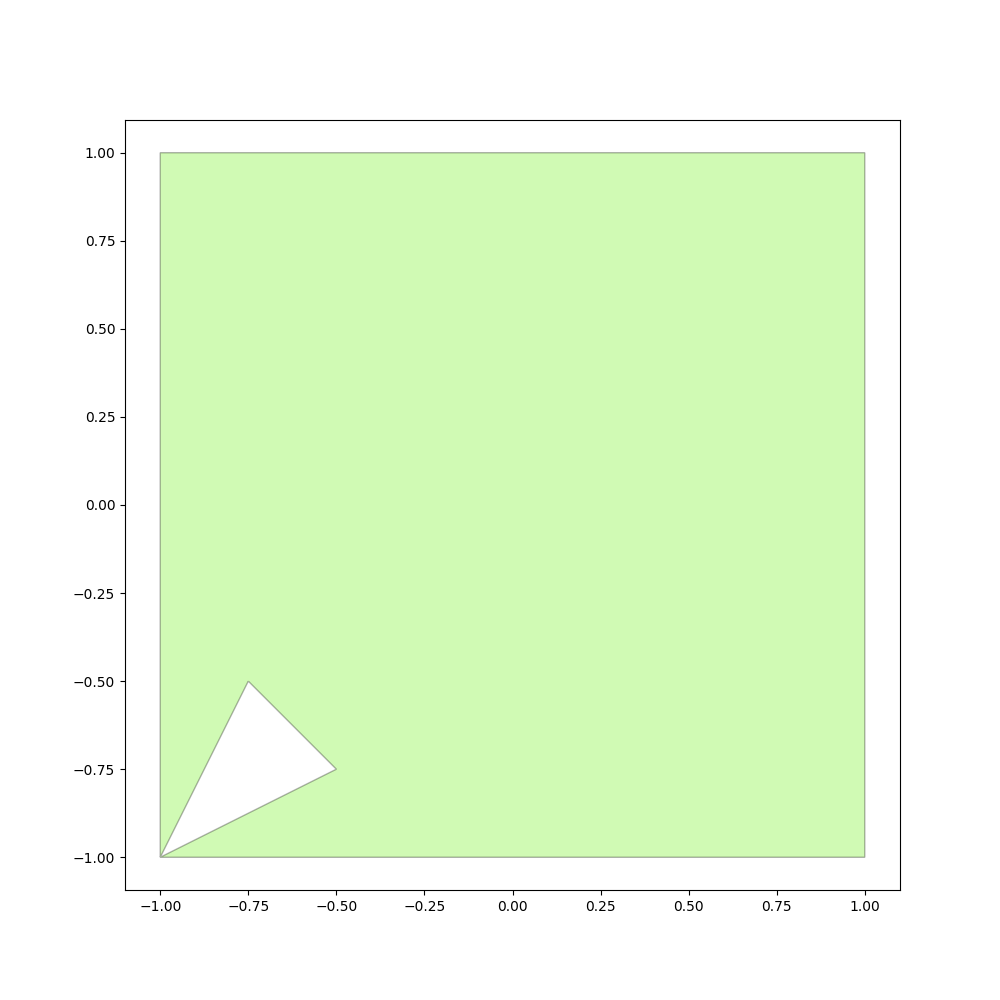

True


In [10]:
# interior touching corner of exterior is okay
exterior = [
    Point(-1, -1),
    Point(-1, 1),
    Point(1, 1),
    Point(1, -1),
    Point(-1, -1),
]
interior = [
    Point(-0.75, -0.5),
    Point(-0.5, -0.75),
    Point(-1, -1),
]

polygon = Polygon(exterior, [interior])
print(polygon.is_valid)
viz.show_polygons([polygon])

fixed = fix_polygon(polygon)
viz.show_polygons(fixed)
for f in fixed:
    print(f.is_valid)

False


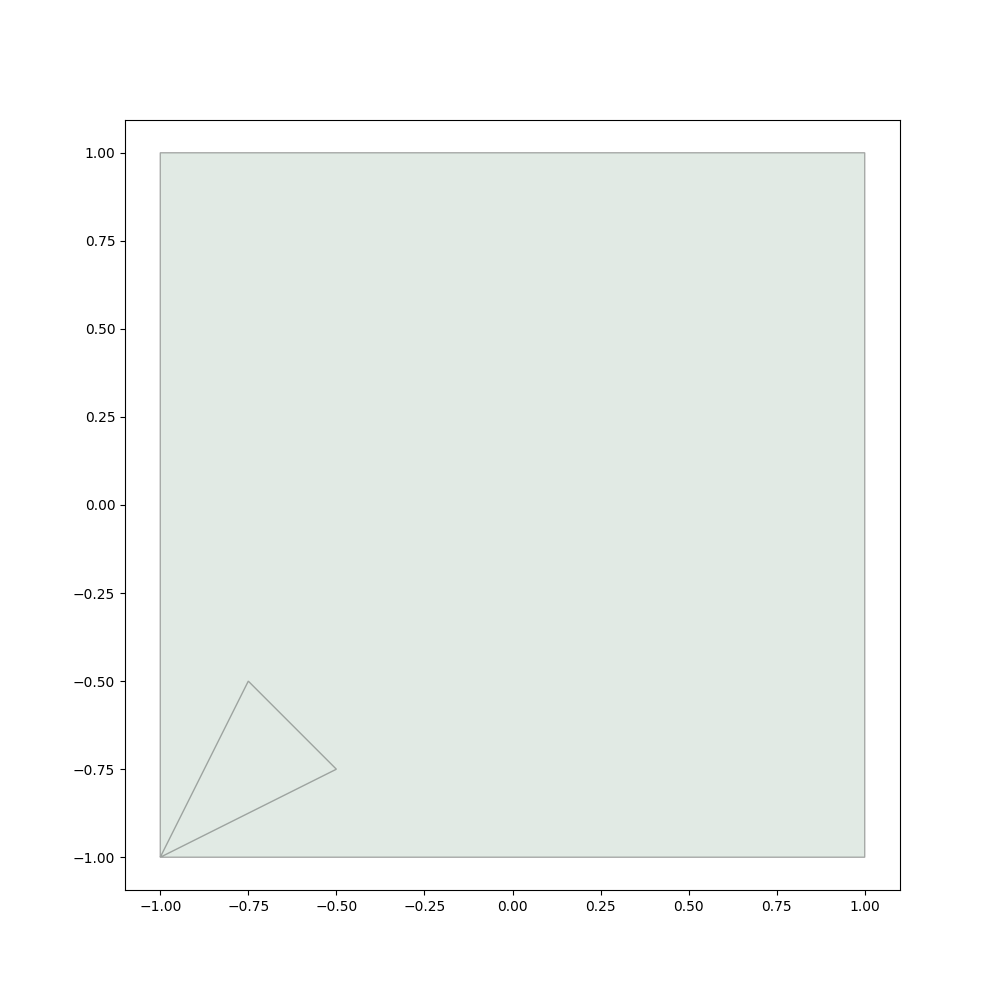

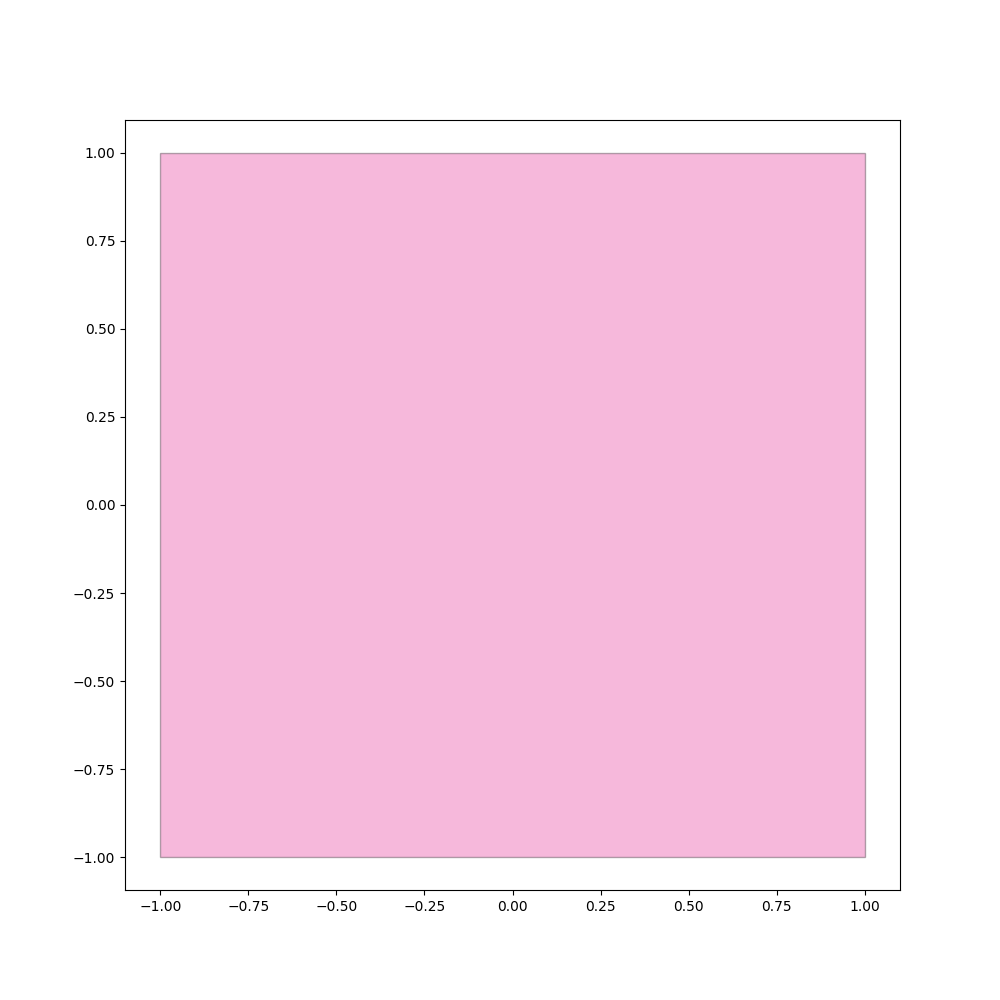

True


In [11]:
# exterior touching corner of itself
# TODO: Should inner shape become hole?
exterior = [
    Point(-1, -1),
    Point(-1, 1),
    Point(1, 1),
    Point(1, -1),
    Point(-1, -1),
    Point(-0.75, -0.5),
    Point(-0.5, -0.75),
    Point(-1, -1),
]

polygon = Polygon(exterior)
print(polygon.is_valid)
viz.show_polygons([polygon])

fixed = fix_polygon(polygon)
viz.show_polygons(fixed)
for f in fixed:
    print(f.is_valid)

False


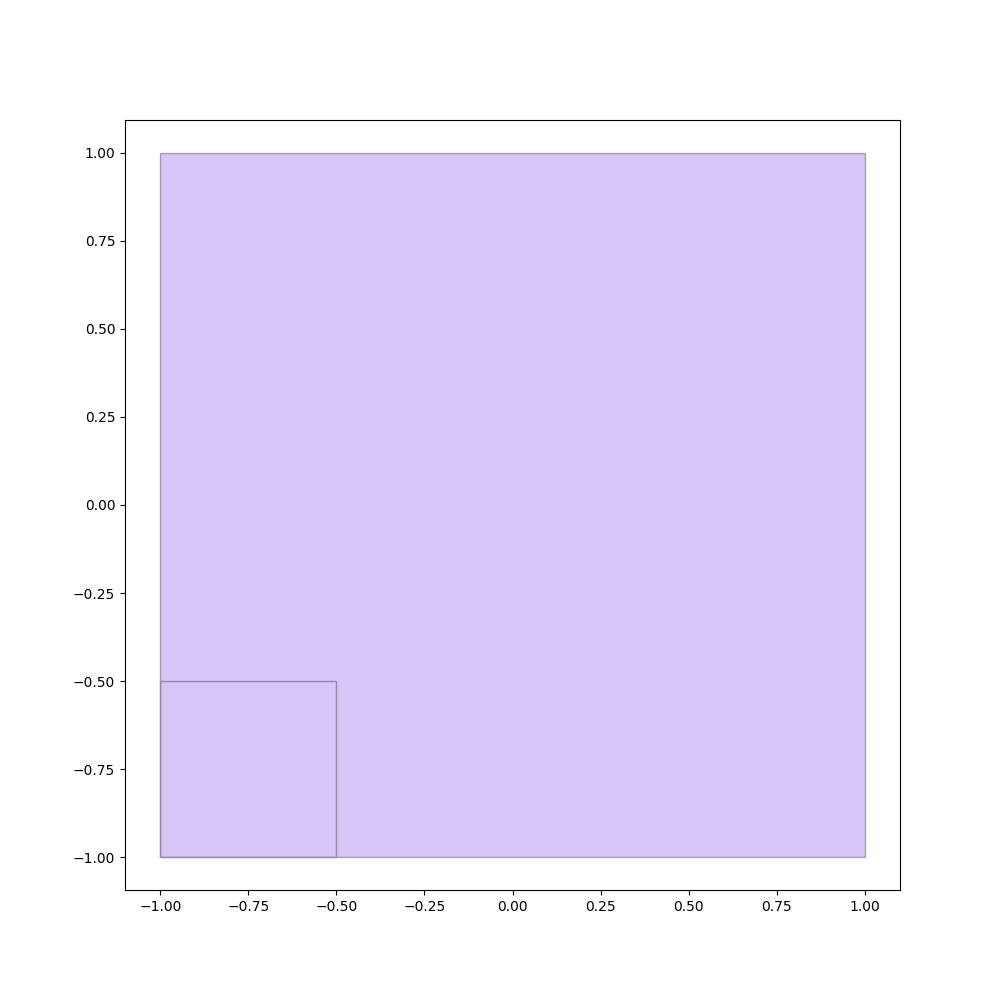

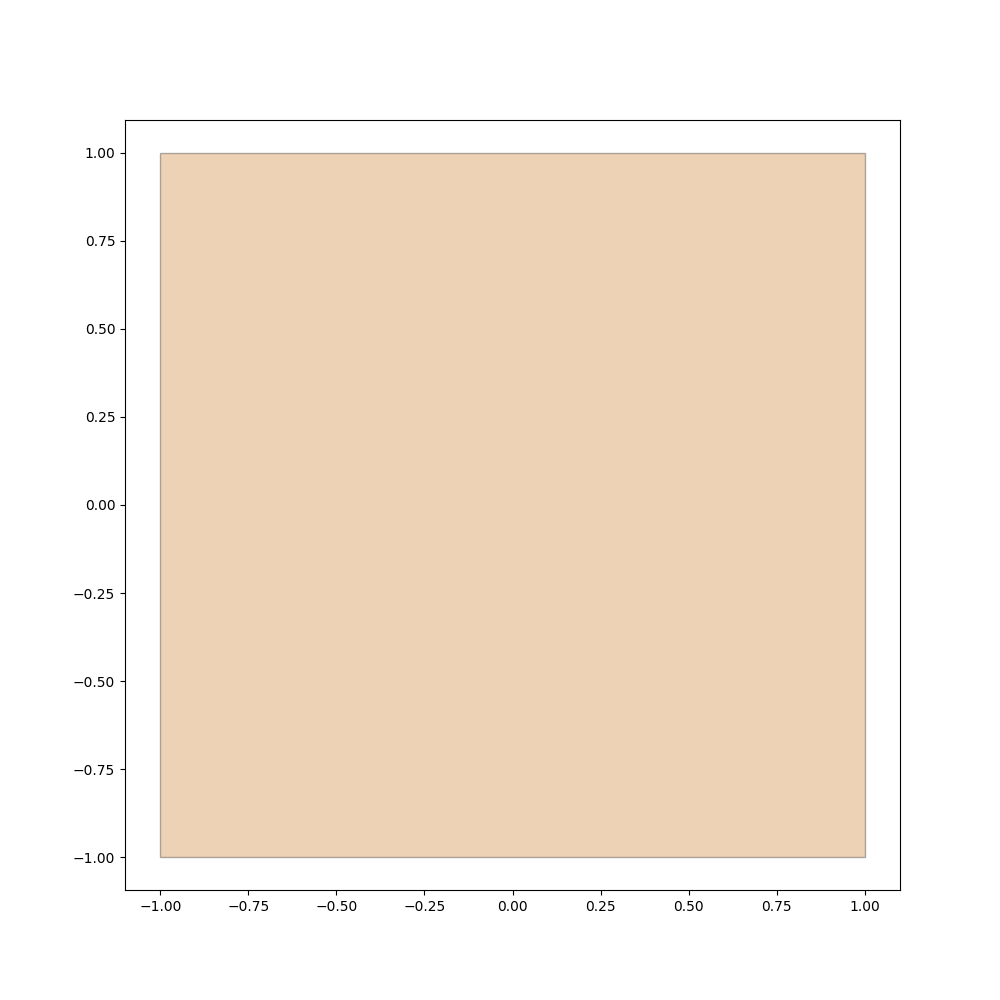

True


In [12]:
# exterior touching boundary of itself
# TODO: Should inner shape become hole?
exterior = [
    Point(-1, -1),
    Point(-1, 1),
    Point(1, 1),
    Point(1, -1),
    Point(-1, -1),
    Point(-1, -0.5),
    Point(-0.5, -0.5),
    Point(-0.5, -1),
    Point(-1, -1),
]

polygon = Polygon(exterior)
print(polygon.is_valid)
viz.show_polygons([polygon])

fixed = fix_polygon(polygon)
viz.show_polygons(fixed)
for f in fixed:
    print(f.is_valid)

False


/home/sydney/projects/geopolygonize/utilities/visualization.py:53: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(10, 10))


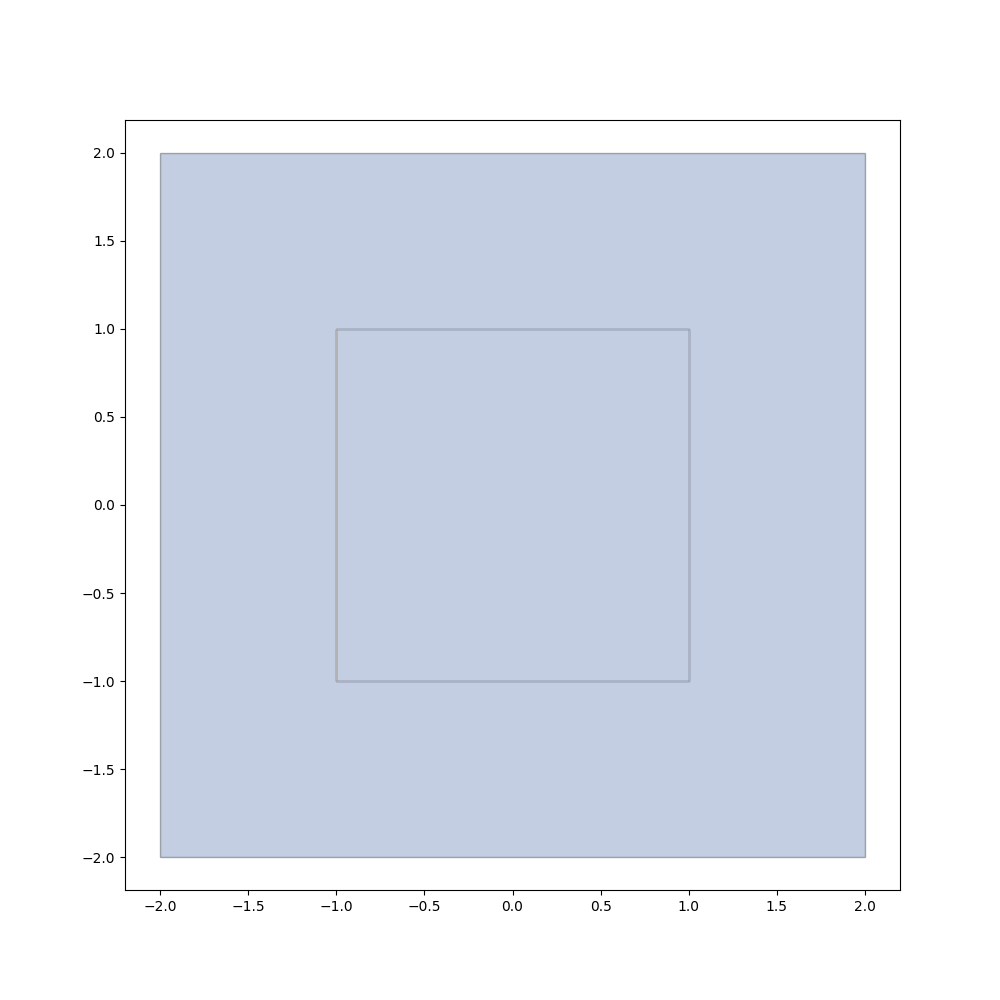

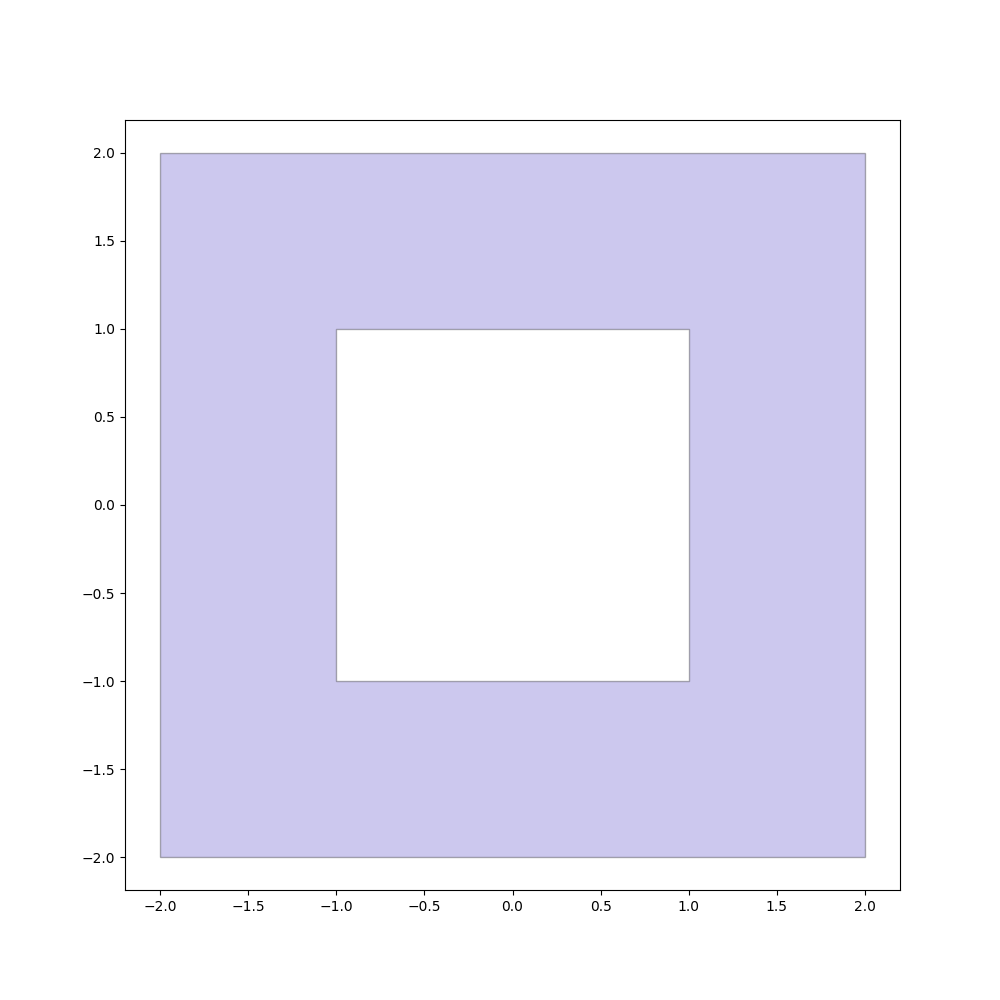

True


In [13]:
# interior double-counting
exterior = [
    Point(-2, -2),
    Point(-2, 2),
    Point(2, 2),
    Point(2, -2),
    Point(-2, -2),
]
interior = [
    Point(-1, -1),
    Point(-1, 1),
    Point(1, 1),
    Point(1, -1),
    Point(-1, -1),
    Point(-1, -1),
    Point(-1, 1),
    Point(1, 1),
    Point(1, -1),
    Point(-1, -1),
]

polygon = Polygon(exterior, [interior])
print(polygon.is_valid)
viz.show_polygons([polygon])

fixed = fix_polygon(polygon)
viz.show_polygons(fixed)
for f in fixed:
    print(f.is_valid)

False


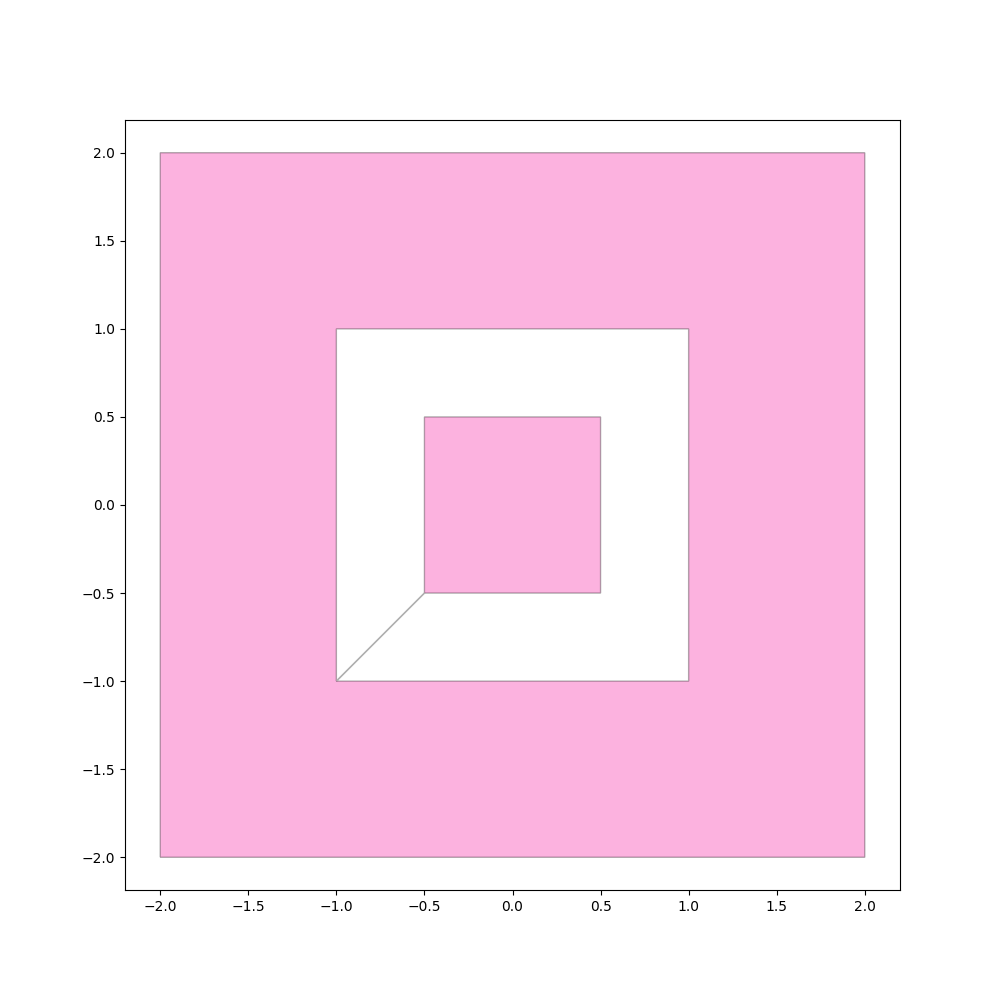

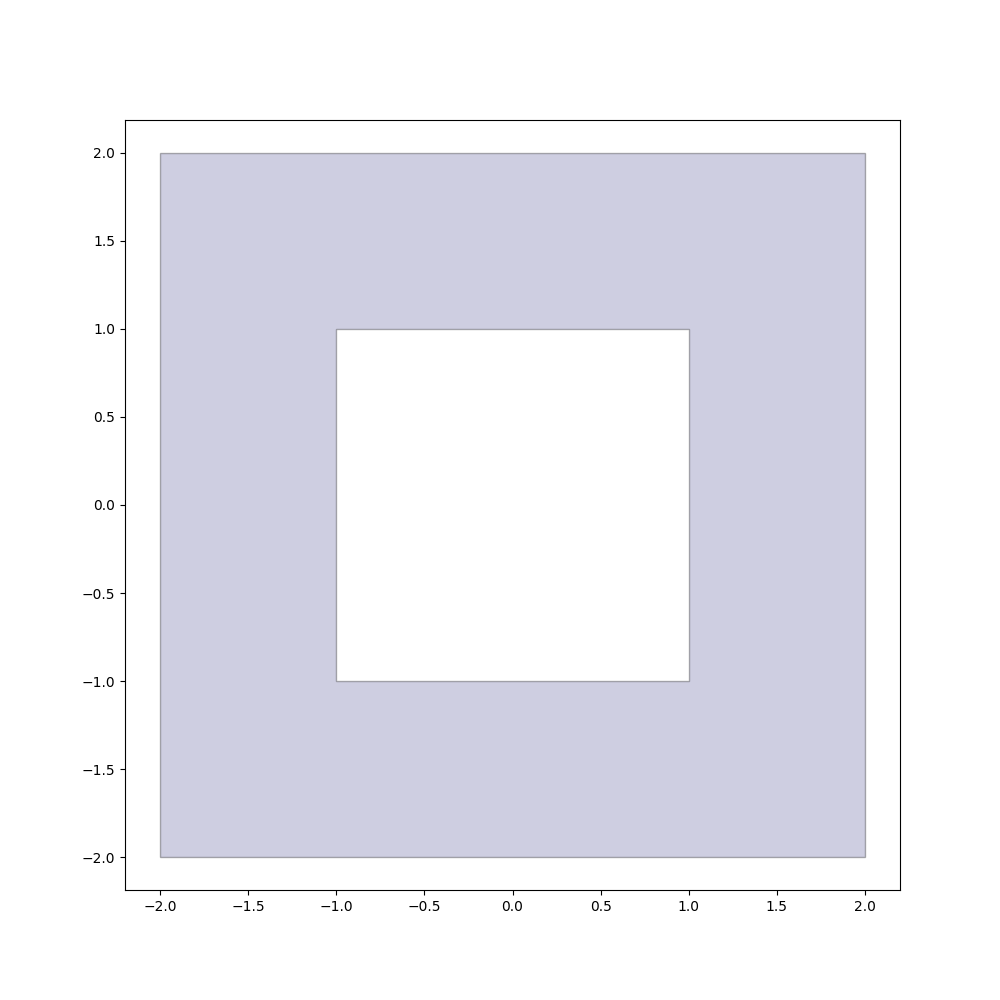

True


In [14]:
# interior in interior
# TODO: Should inner-inner shape become new polygon?
exterior = [
    Point(-2, -2),
    Point(-2, 2),
    Point(2, 2),
    Point(2, -2),
    Point(-2, -2),
]
interior = [
    Point(-1, -1),
    Point(-1, 1),
    Point(1, 1),
    Point(1, -1),
    Point(-1, -1),
    Point(-0.5, -0.5),
    Point(-0.5, 0.5),
    Point(0.5, 0.5),
    Point(0.5, -0.5),
    Point(-0.5, -0.5),
    Point(-1, -1),
]

polygon = Polygon(exterior, [interior])
print(polygon.is_valid)
viz.show_polygons([polygon])

fixed = fix_polygon(polygon)
viz.show_polygons(fixed)
for f in fixed:
    print(f.is_valid)

False


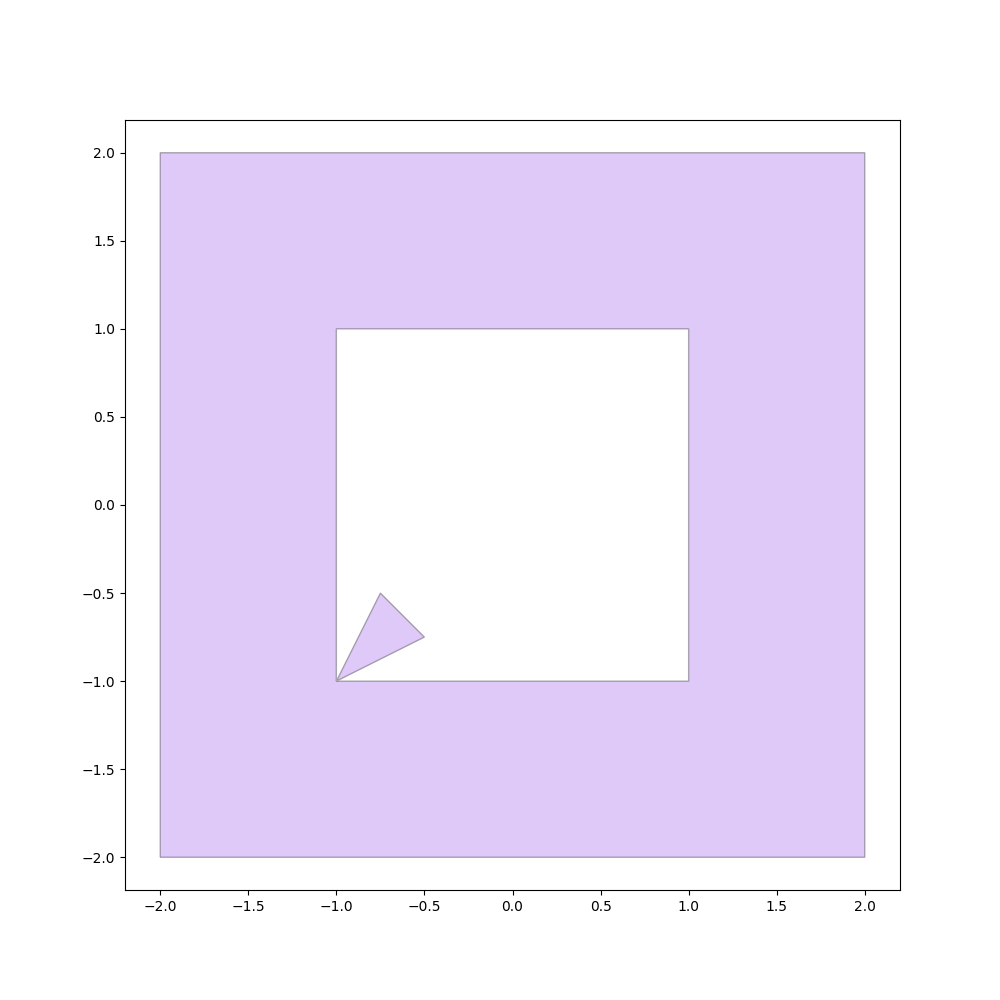

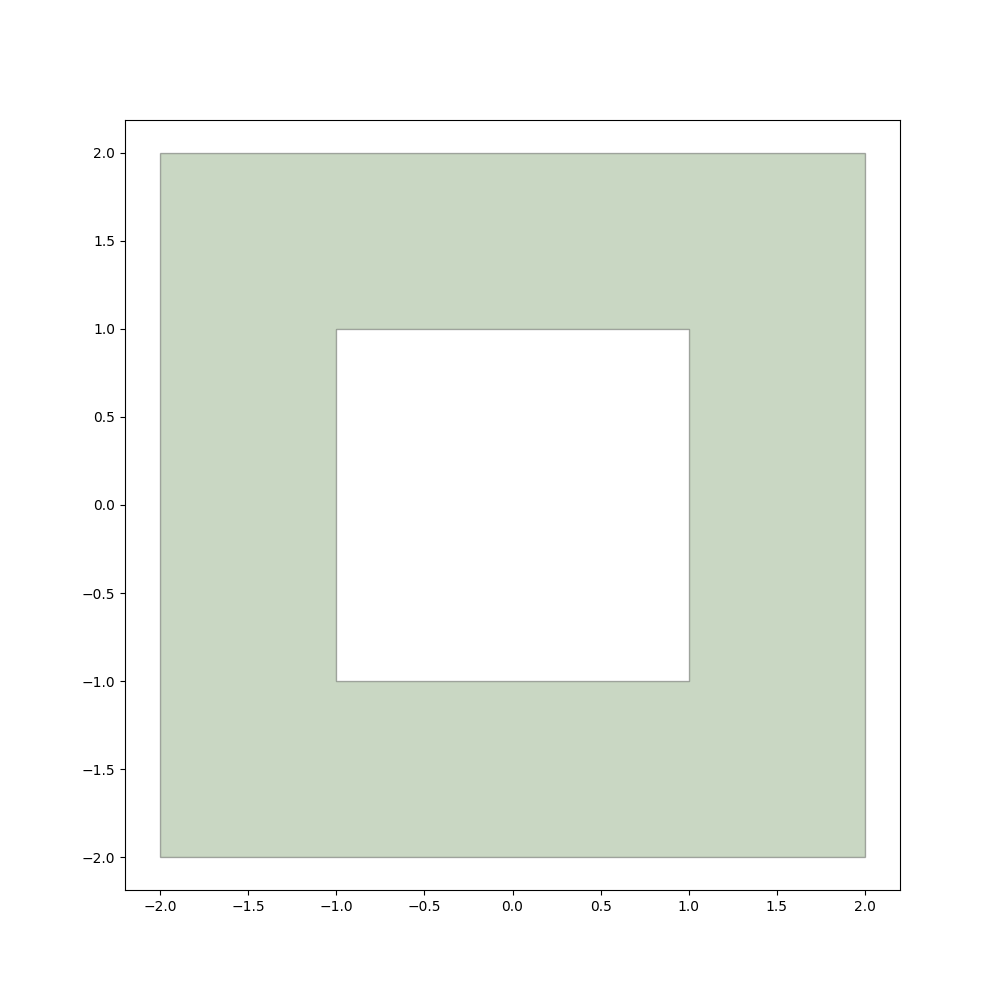

True


In [15]:
# interior in interior touching corner
# TODO: Should inner-inner shape become new polygon?
exterior = [
    Point(-2, -2),
    Point(-2, 2),
    Point(2, 2),
    Point(2, -2),
    Point(-2, -2),
]
interior = [
    Point(-1, -1),
    Point(-1, 1),
    Point(1, 1),
    Point(1, -1),
    Point(-1, -1),
    Point(-0.75, -0.5),
    Point(-0.5, -0.75),
    Point(-1, -1),
]

polygon = Polygon(exterior, [interior])
print(polygon.is_valid)
viz.show_polygons([polygon])

fixed = fix_polygon(polygon)
viz.show_polygons(fixed)
for f in fixed:
    print(f.is_valid)

False


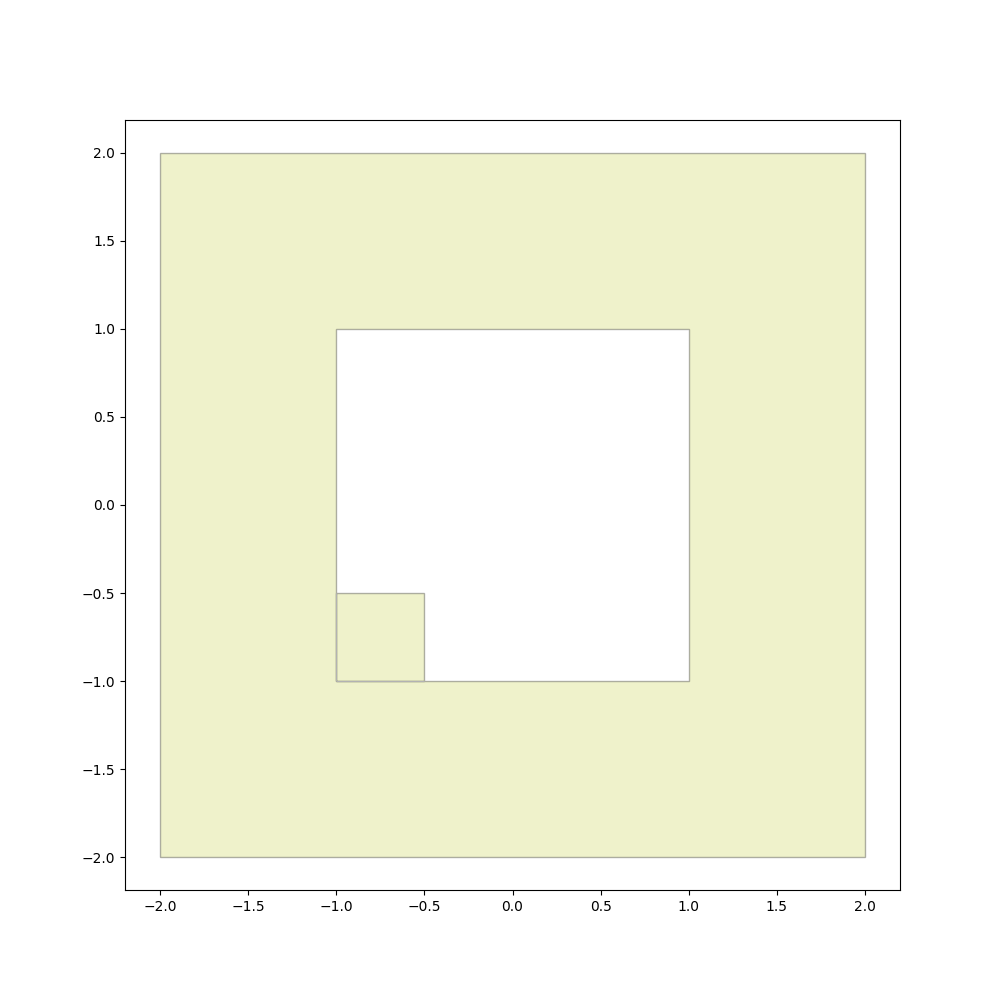

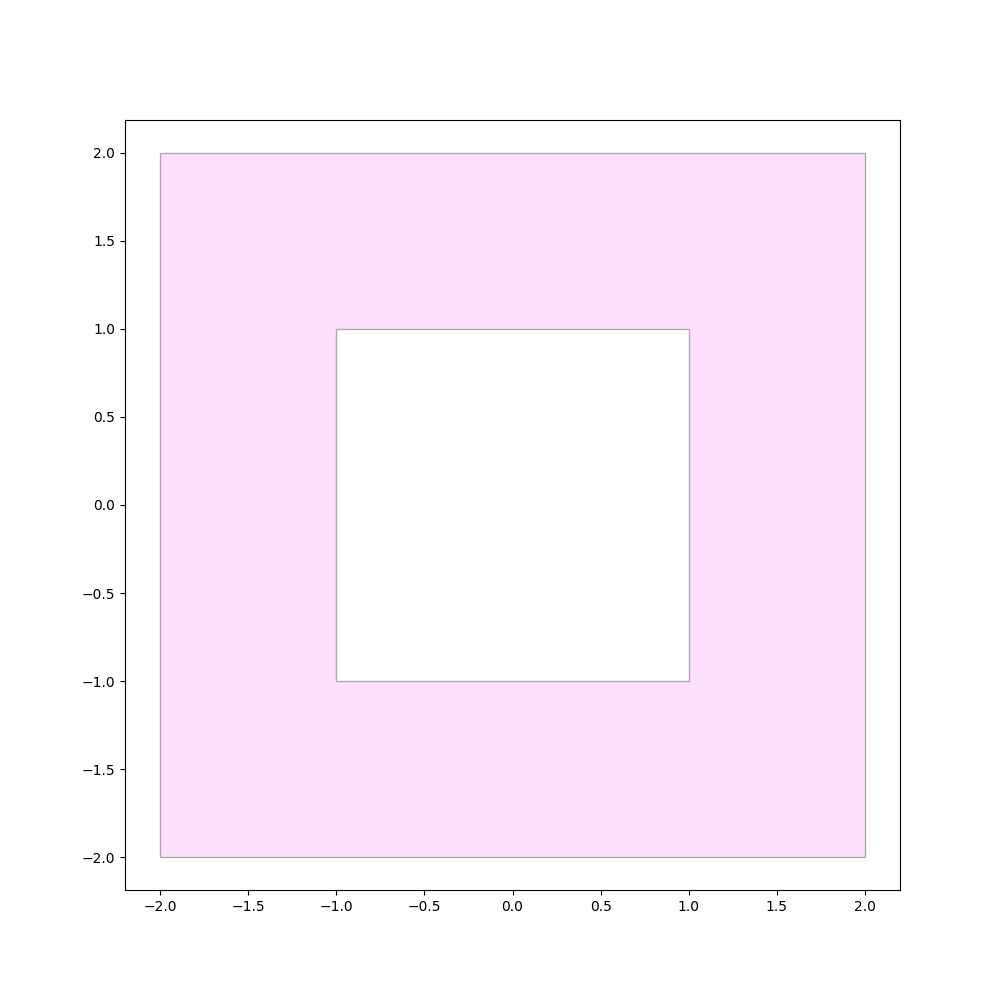

True


In [16]:
# interior in interior touching boundary
# TODO: Should inner-inner shape become new polygon?
exterior = [
    Point(-2, -2),
    Point(-2, 2),
    Point(2, 2),
    Point(2, -2),
    Point(-2, -2),
]
interior = [
    Point(-1, -1),
    Point(-1, 1),
    Point(1, 1),
    Point(1, -1),
    Point(-1, -1),
    Point(-1, -0.5),
    Point(-0.5, -0.5),
    Point(-0.5, -1),
    Point(-1, -1),
]

polygon = Polygon(exterior, [interior])
print(polygon.is_valid)
viz.show_polygons([polygon])

fixed = fix_polygon(polygon)
viz.show_polygons(fixed)
for f in fixed:
    print(f.is_valid)

False


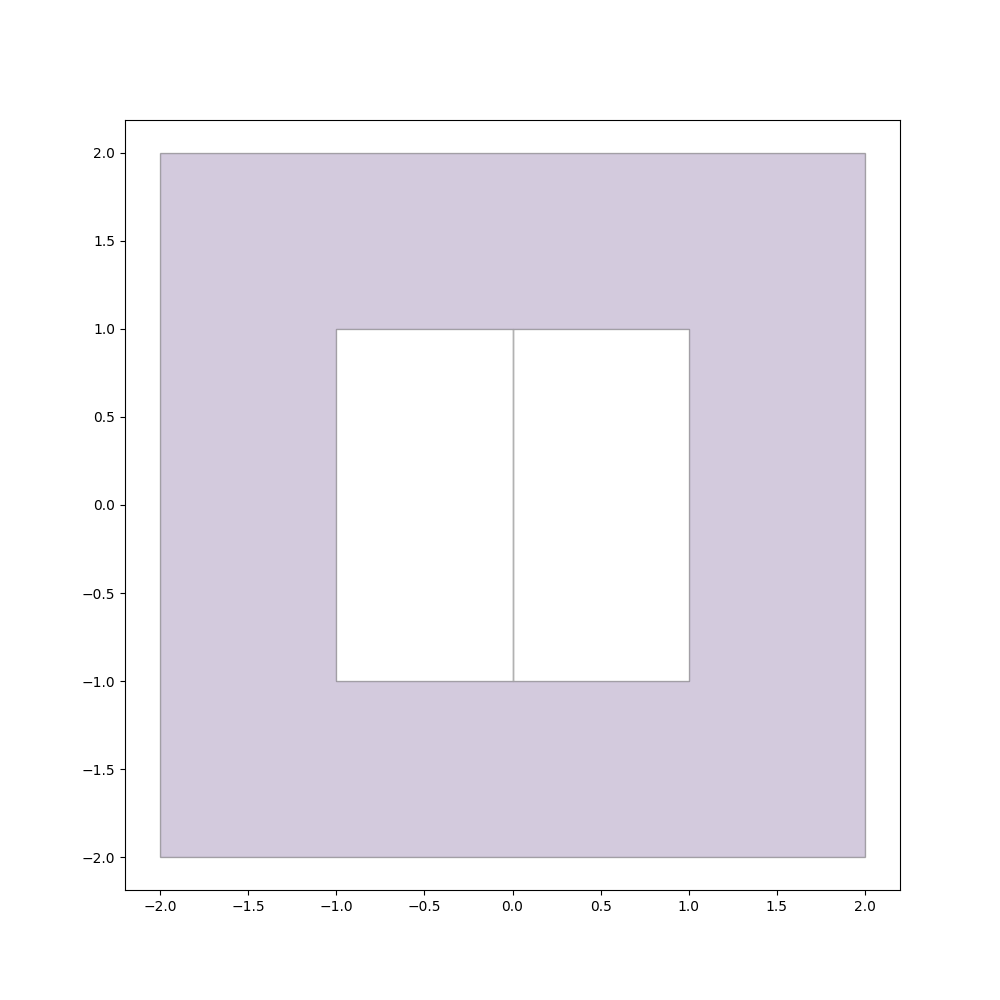

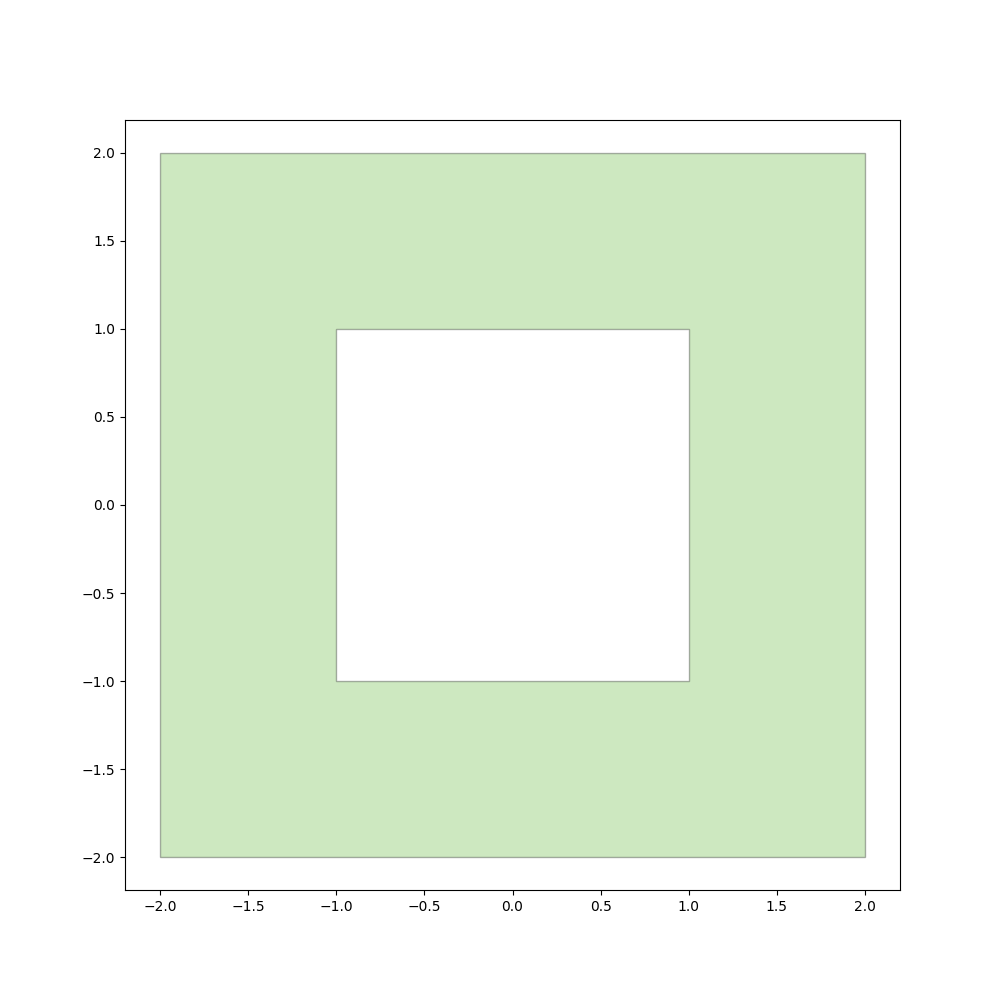

True


In [17]:
# interior touching another interior on a boundary
exterior = [
    Point(-2, -2),
    Point(-2, 2),
    Point(2, 2),
    Point(2, -2),
    Point(-2, -2),
]
interior_left = [
    Point(-1, -1),
    Point(-1, 1),
    Point(0, 1),
    Point(0, -1),
    Point(-1, -1),
]
interior_right = [
    Point(1, -1),
    Point(0, -1),
    Point(0, 1),
    Point(1, 1),
    Point(1, -1),
]

polygon = Polygon(exterior, [interior_left, interior_right])
print(polygon.is_valid)
viz.show_polygons([polygon])

fixed = fix_polygon(polygon)
viz.show_polygons(fixed)
for f in fixed:
    print(f.is_valid)

False


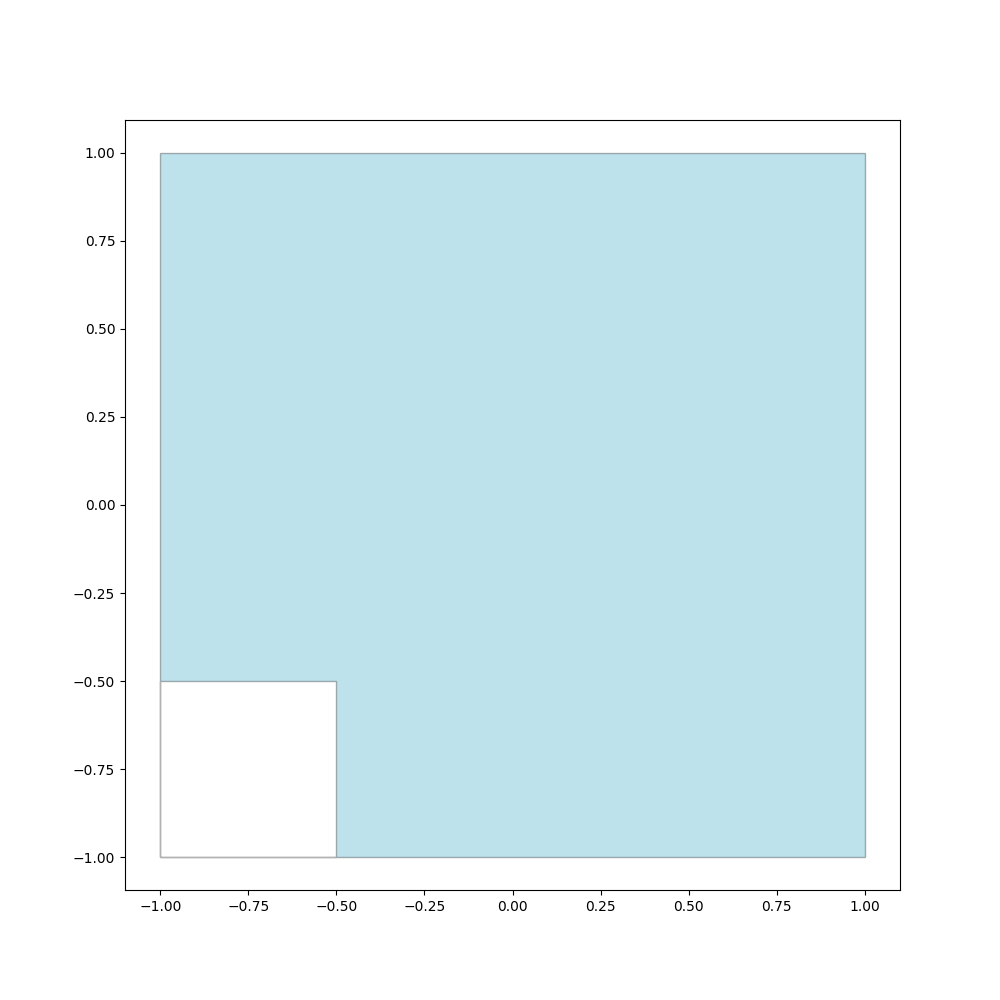

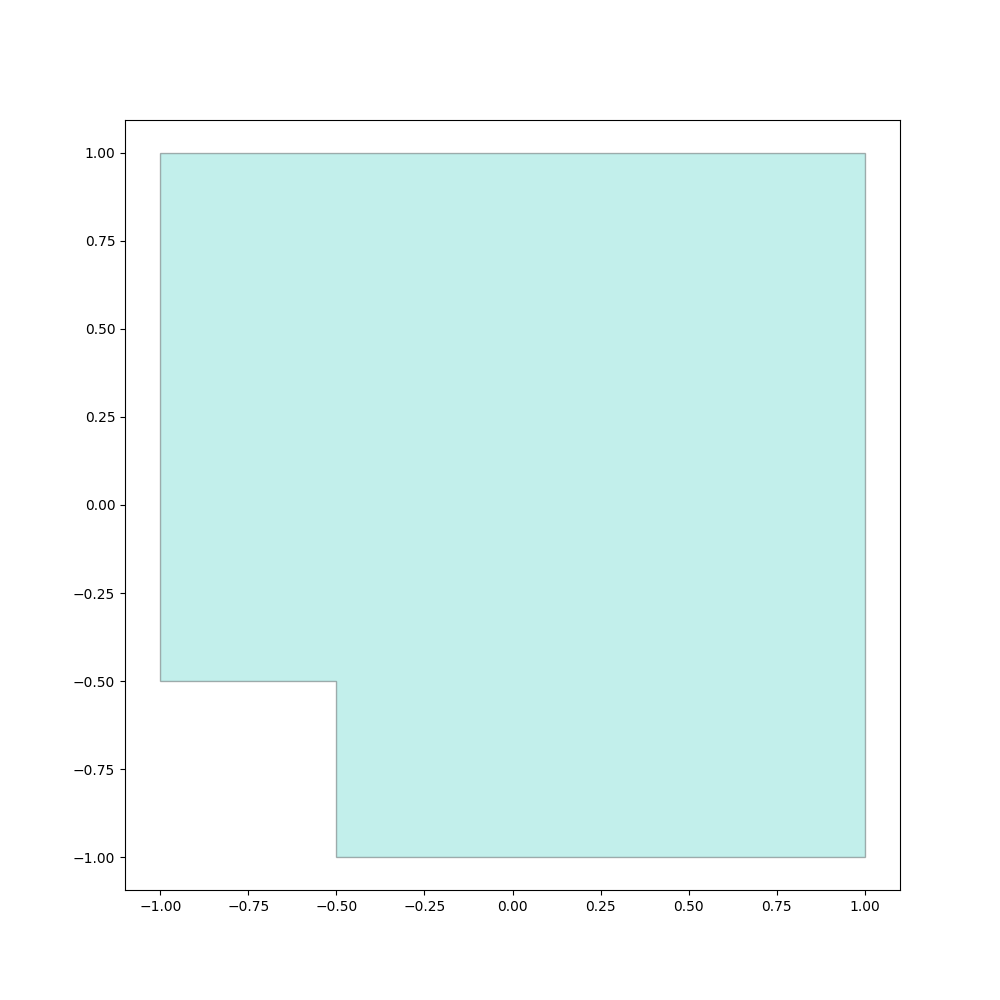

True


In [18]:
# interior touching exterior on a boundary
exterior = [
    Point(-1, -1),
    Point(-1, 1),
    Point(1, 1),
    Point(1, -1),
    Point(-1, -1),
]

interior = [
    Point(-1, -1),
    Point(-1, -0.5),
    Point(-0.5, -0.5),
    Point(-0.5, -1),
    Point(-1, -1),
]

polygon = Polygon(exterior, [interior])
print(polygon.is_valid)
viz.show_polygons([polygon])

fixed = fix_polygon(polygon)
viz.show_polygons(fixed)
for f in fixed:
    print(f.is_valid)

False


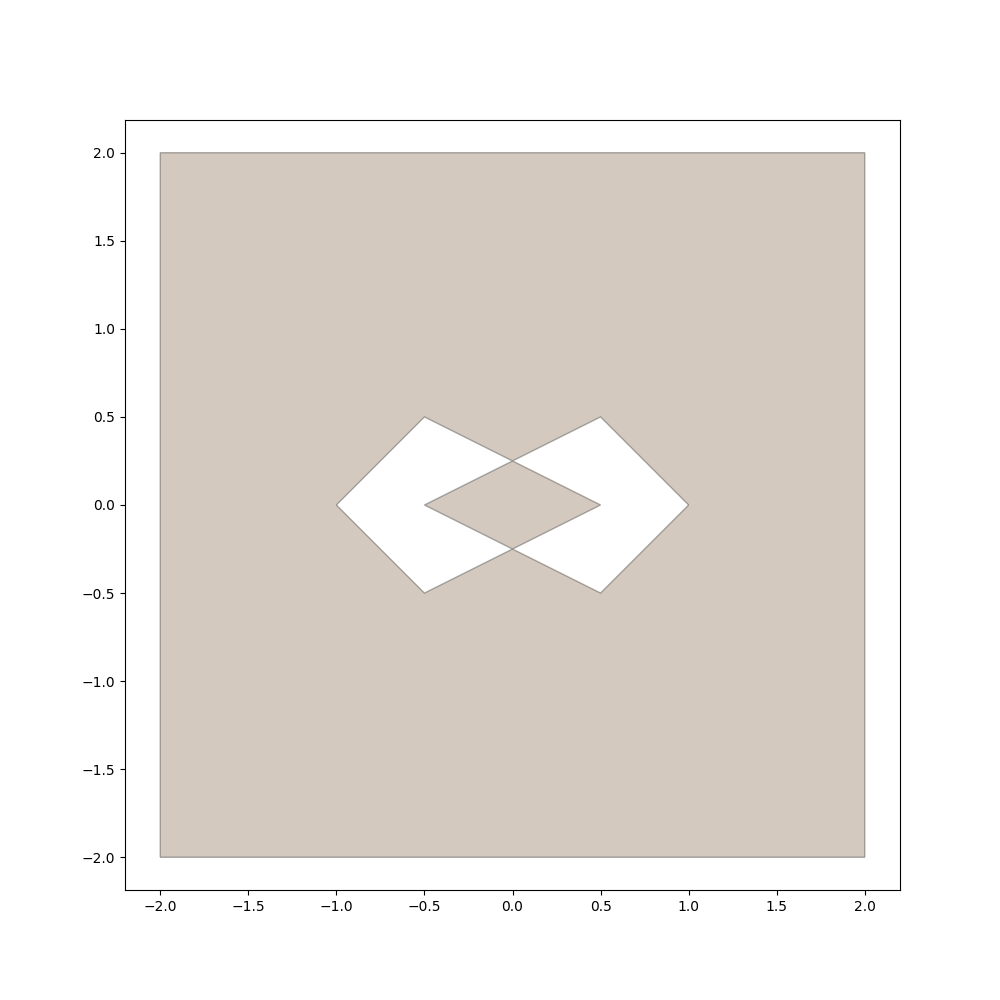

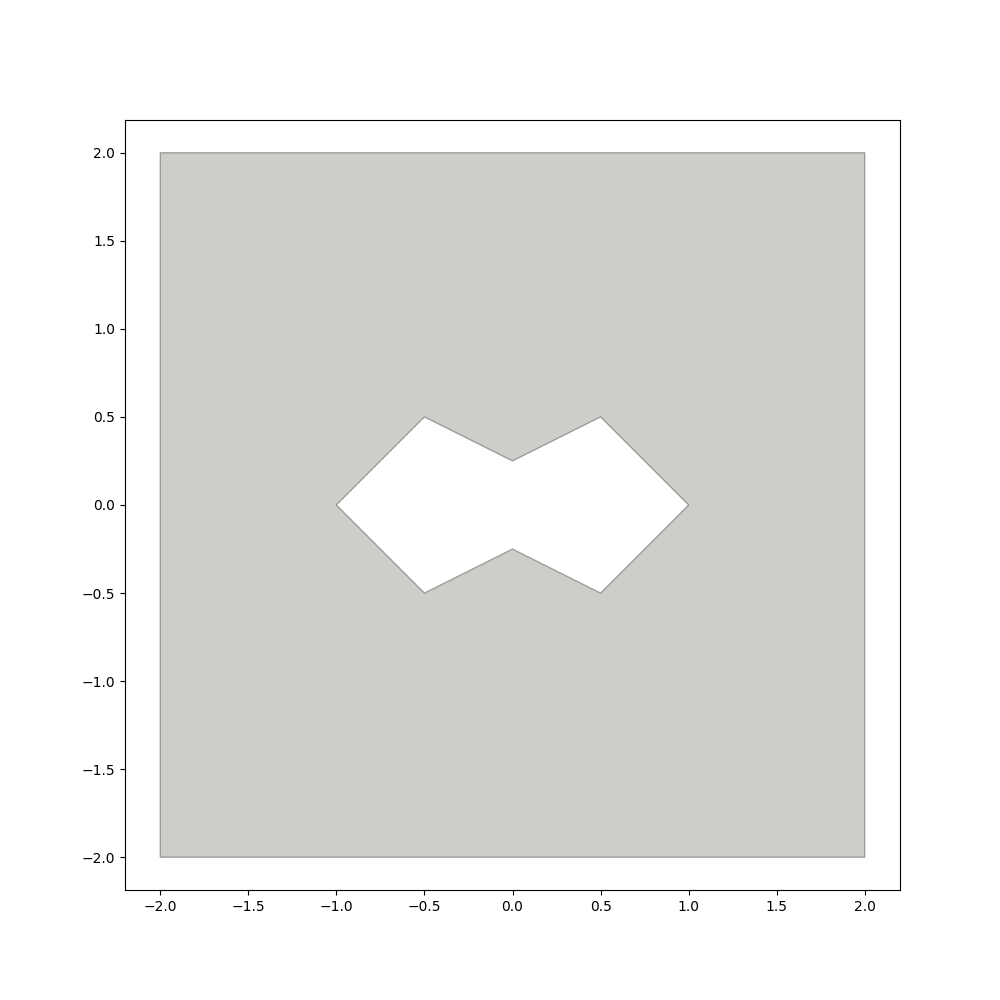

True


In [19]:
# interiors intersect at an area
exterior = [
    Point(-2, -2),
    Point(-2, 2),
    Point(2, 2),
    Point(2, -2),
    Point(-2, -2),
]
interior_left = [
    Point(-1, 0),
    Point(-0.5, 0.5),
    Point(0.5, 0),
    Point(-0.5, -0.5),
    Point(-1, 0),
]
interior_right = [
    Point(1, 0),
    Point(0.5, -0.5),
    Point(-0.5, 0),
    Point(0.5, 0.5),
    Point(1, 0),
]

polygon = Polygon(exterior, [interior_left, interior_right])
print(polygon.is_valid)
viz.show_polygons([polygon])

fixed = fix_polygon(polygon)
viz.show_polygons(fixed)
for f in fixed:
    print(f.is_valid)

False


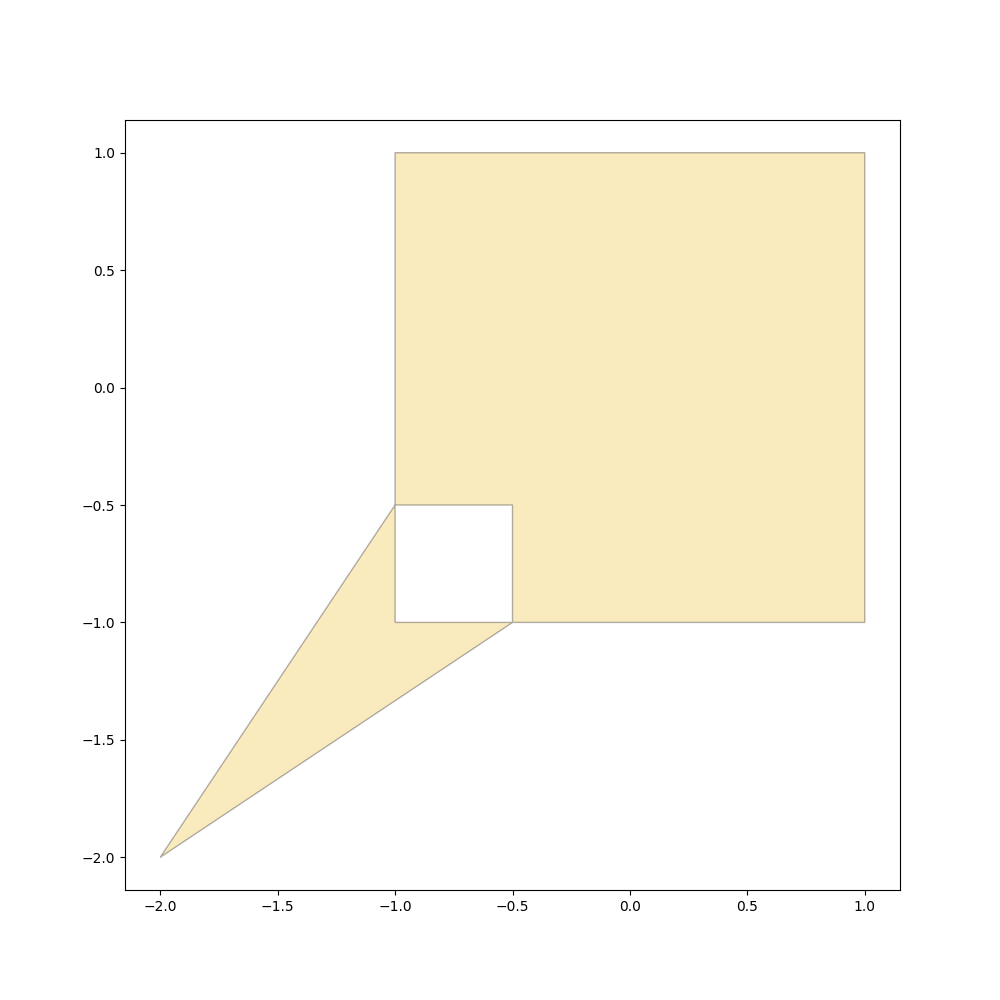

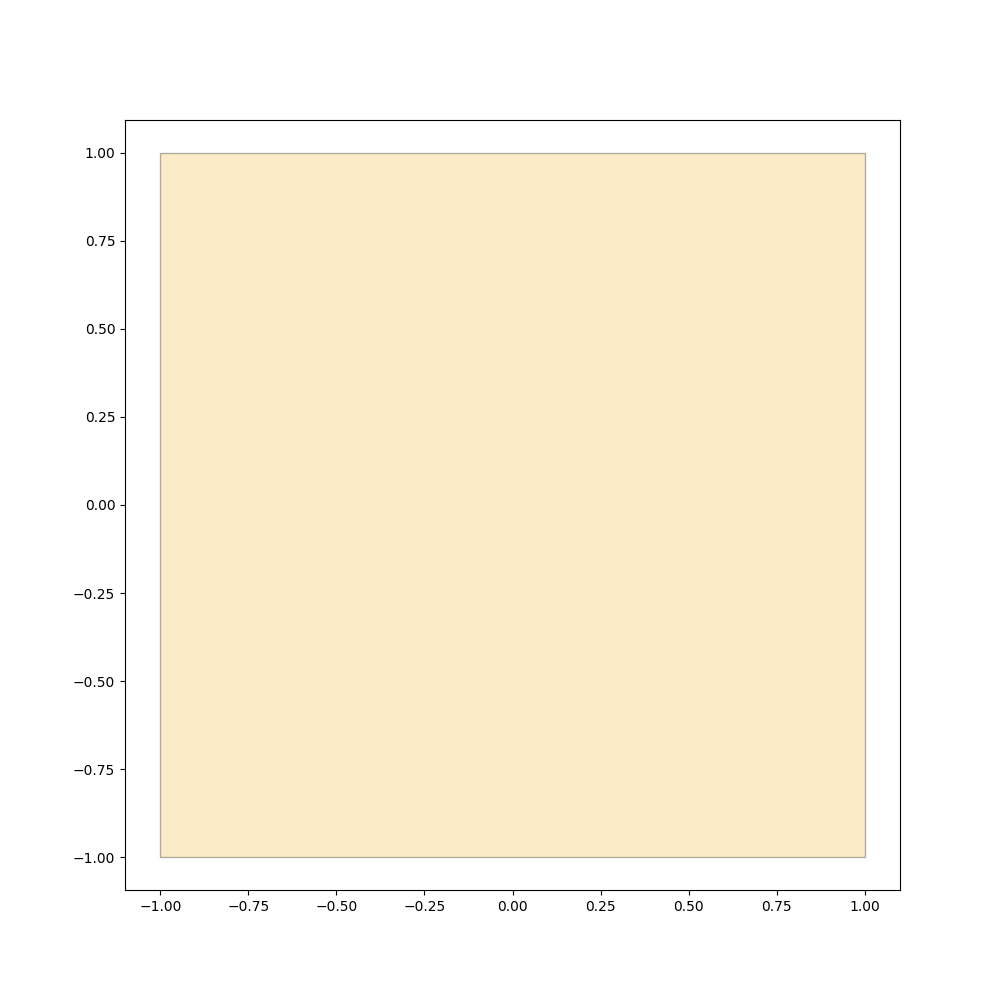

True


In [20]:
# interior intersects with exterior at an area
# TODO: We just throw the interior out; should we take the diff from the exterior?
exterior = [
    Point(-1, -1),
    Point(-1, 1),
    Point(1, 1),
    Point(1, -1),
    Point(-1, -1),
]

interior = [
    Point(-2, -2),
    Point(-1, -0.5),
    Point(-0.5, -0.5),
    Point(-0.5, -1),
    Point(-2, -2),
]

polygon = Polygon(exterior, [interior])
print(polygon.is_valid)
viz.show_polygons([polygon])

fixed = fix_polygon(polygon)
viz.show_polygons(fixed)
for f in fixed:
    print(f.is_valid)

Original validity: False
Fixed validity: False


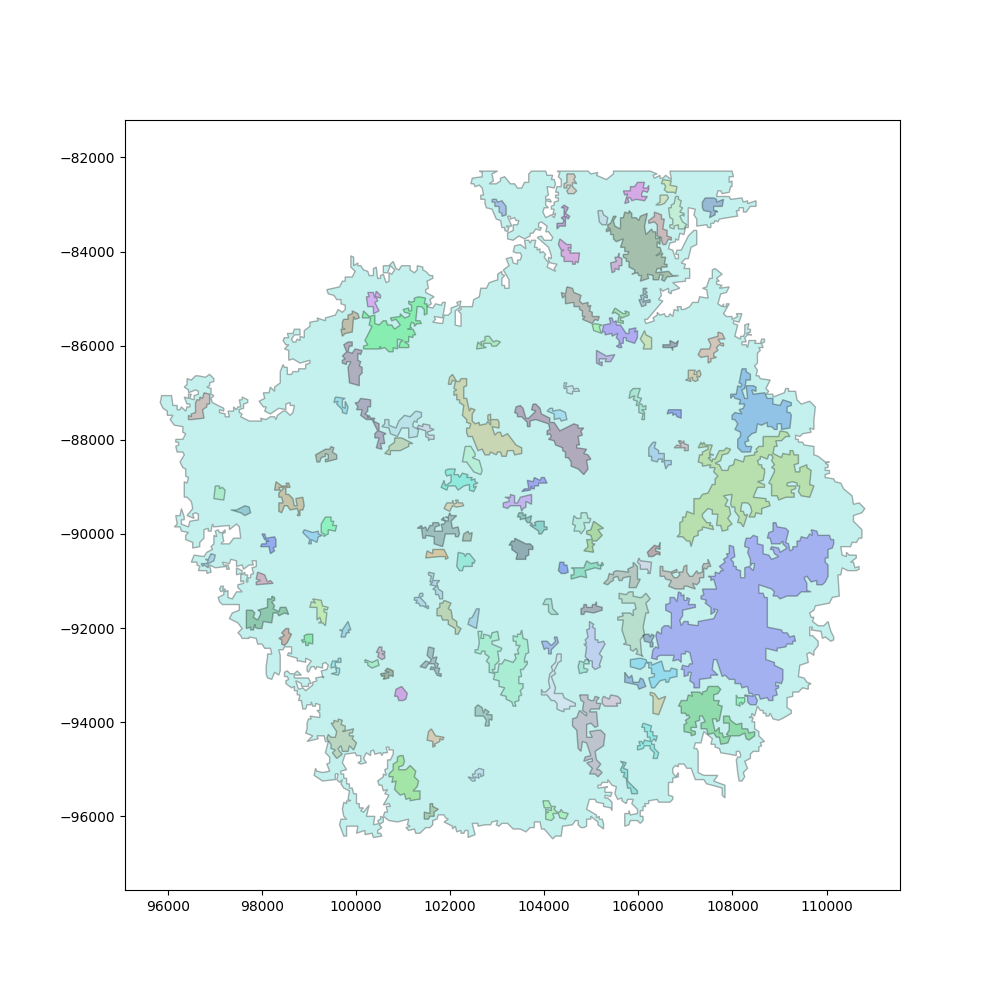

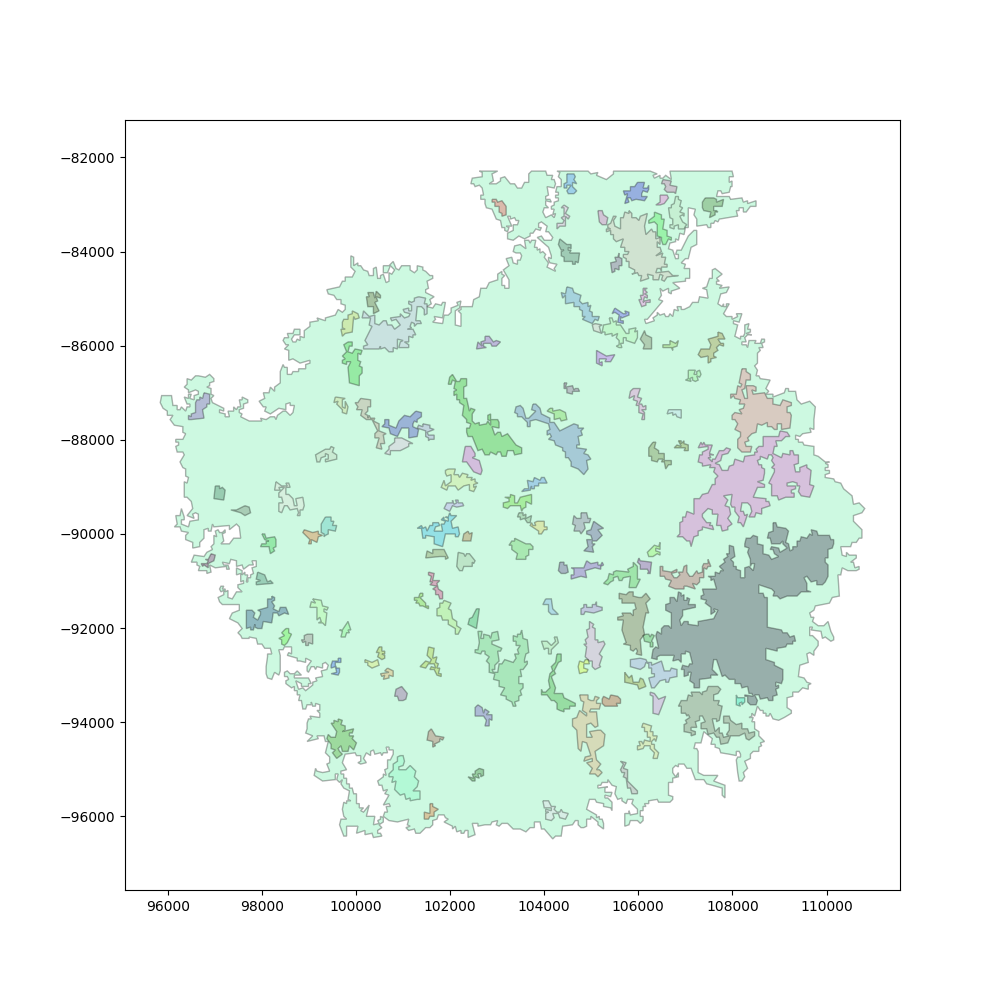

NameError: name 'rend' is not defined

In [21]:
# Debugging a broken polygon.

#orig_path = "/tmp/orig_polygon_224699813742727134324065777547161814568"
#fixed_path = "/tmp/fixed_polygon_224699813742727134324065777547161814568"
orig_path = "/tmp/orig_polygon_205652389159720532521251160696177503297"
fixed_path = "/tmp/fixed_polygon_205652389159720532521251160696177503297"

import geojson
from shapely.geometry import shape

with open(orig_path, 'r') as file:
    orig_json = geojson.load(file)
    orig_polygon = shape(orig_json)
    print(f"Original validity: {orig_polygon.is_valid}")

with open(fixed_path, 'r') as file:
    fixed_json = geojson.load(file)
    fixed_polygon = shape(fixed_json)
    print(f"Fixed validity: {fixed_polygon.is_valid}")

viz.show_polygons([Polygon(orig_polygon.exterior)] + [Polygon(interior) for interior in orig_polygon.interiors])
viz.show_polygons([Polygon(fixed_polygon.exterior)] + [Polygon(interior) for interior in fixed_polygon.interiors])

polygon = orig_polygon
fixed = fix_polygon(polygon)
viz.show_polygons([rend(f) for f in fixed])
for f in fixed:
    print(f.is_valid)